### installing squarify library

pip install squarify

### importing dependencies

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import squarify
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)

In [7]:
df=pd.read_csv("data.csv") # loading income data set

In [ ]:
df.describe().columns # status of columns

In [8]:
df.shape # shape of data set

(209499, 43)

In [149]:
df.replace({' ?':np.nan},inplace=True) # removing ? from some columns

In [9]:
total_employed = df['total_employed'].value_counts()
total_employed # total employed counts

0    100688
6     38461
1     24357
4     14969
3     14138
2     10683
5      6203
Name: total_employed, dtype: int64

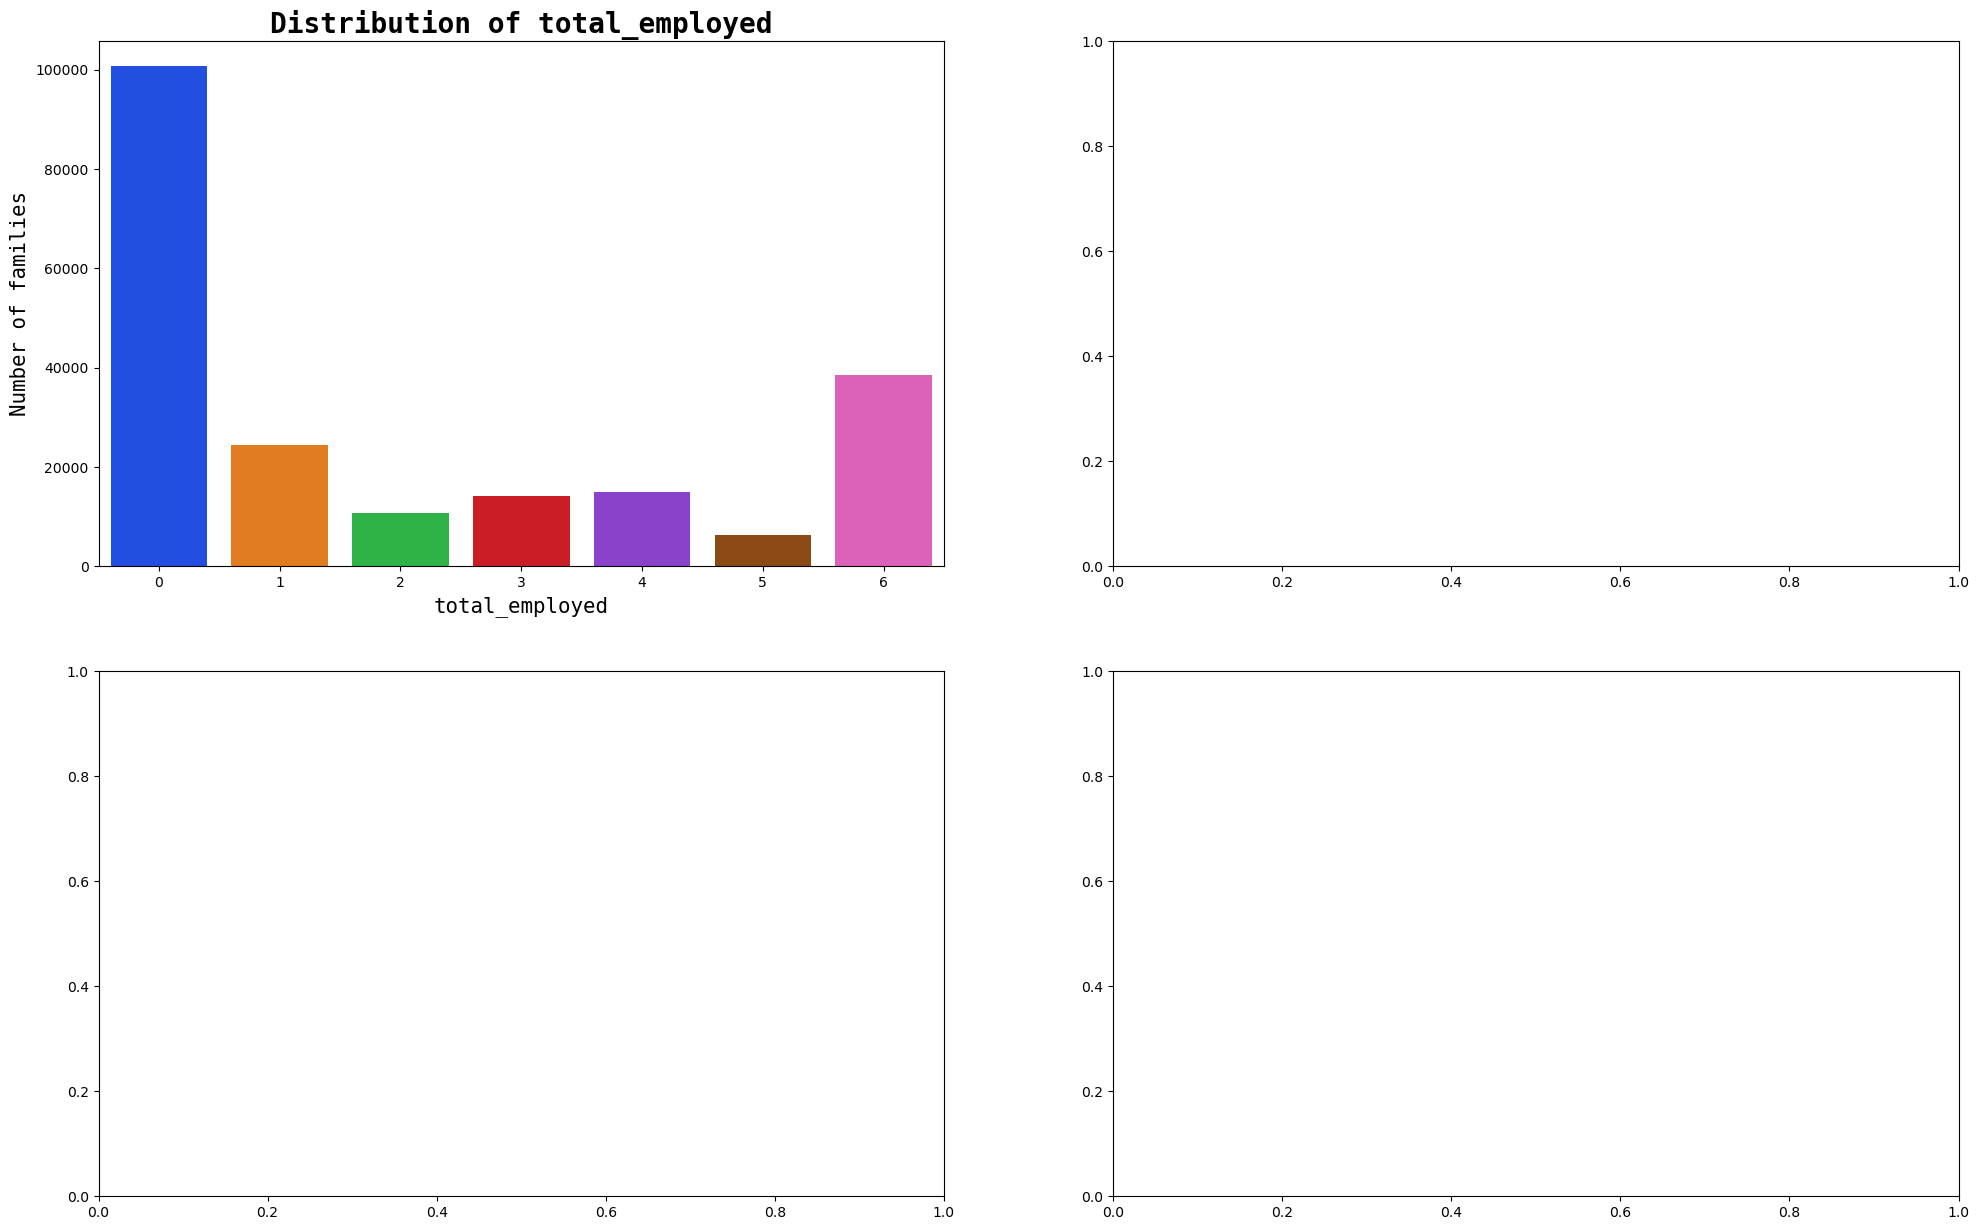

In [10]:
# checking distribution of various columns, EDA
fig, axs = plt.subplots(2, 2, figsize=(24, 15))
# Distribution of total_employed
total_employed = df['total_employed'].value_counts()
sns.barplot(x=total_employed.index, y=total_employed.values, palette='bright', ax=axs[0,0])
axs[0,0].set_title('Distribution of total_employed', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axs[0,0].set_xlabel('total_employed', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[0,0].set_ylabel('Number of families', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[0,0].tick_params(labelsize=10)

    max_rows_analyzed is smaller than dataset shape 209499...
        randomly sampled 150000 rows from read CSV file
Shape of your Data Set loaded: (150000, 43)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  11
    Number of String-Categorical Columns =  20
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  6
    42 Predictors classified...
        7 variable(s) removed since they were ID or low-inf

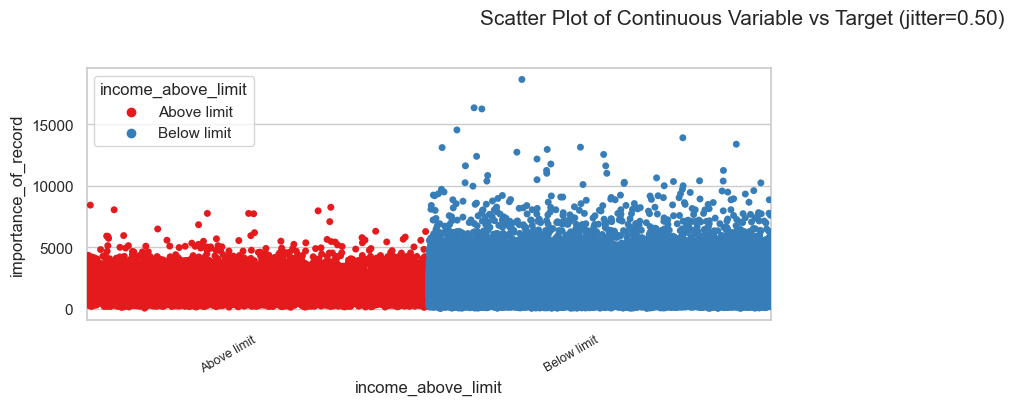

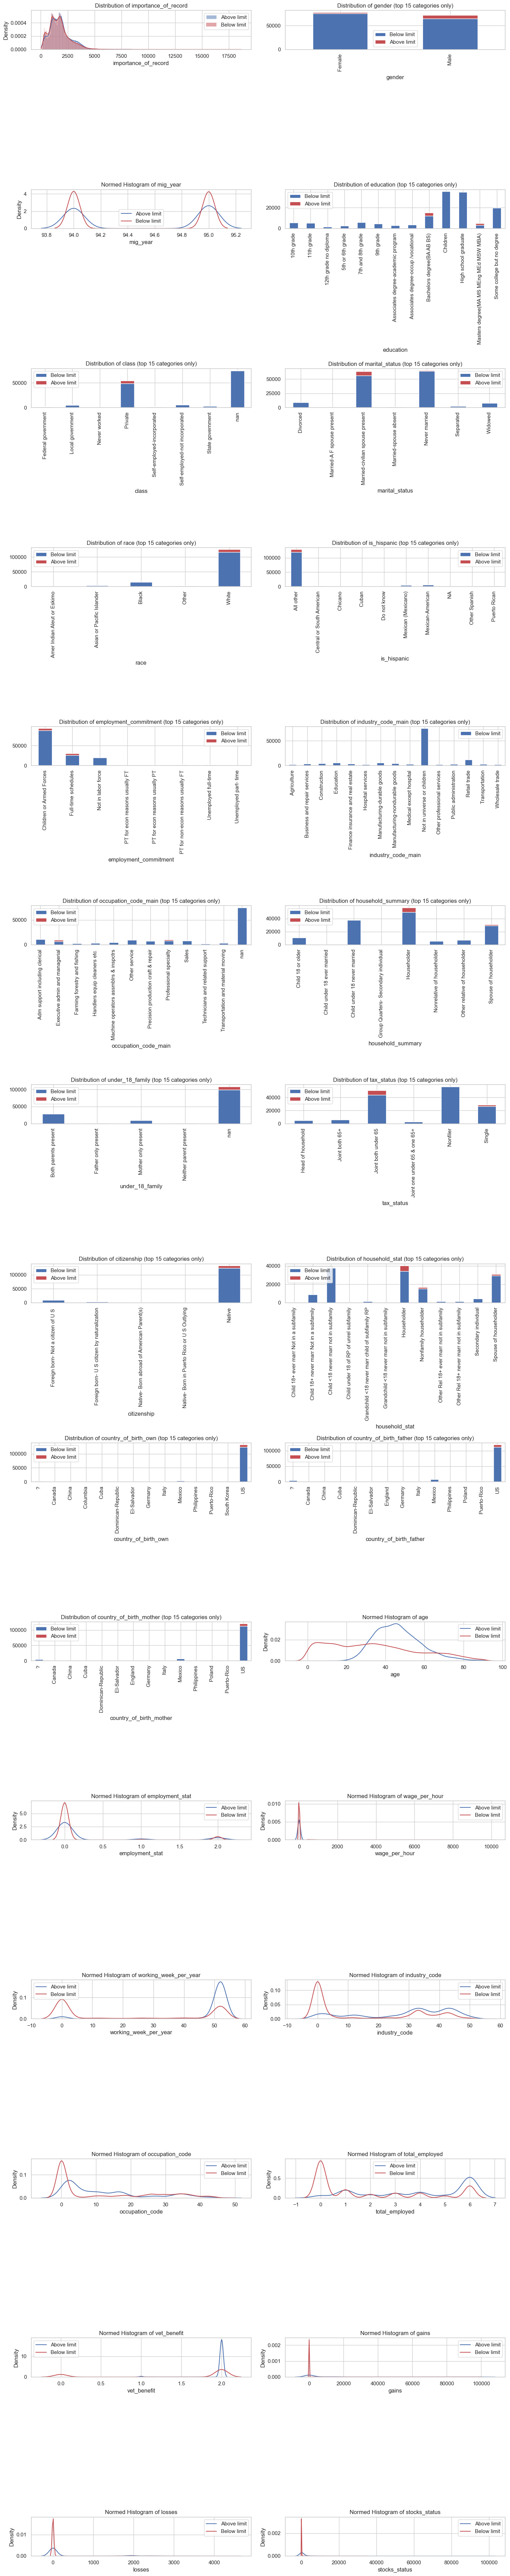

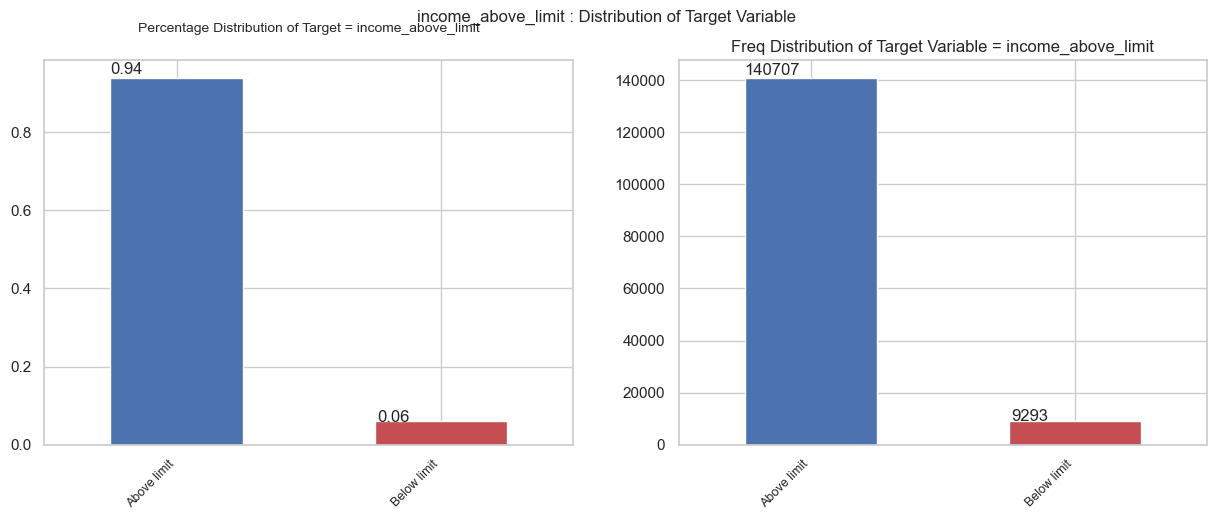

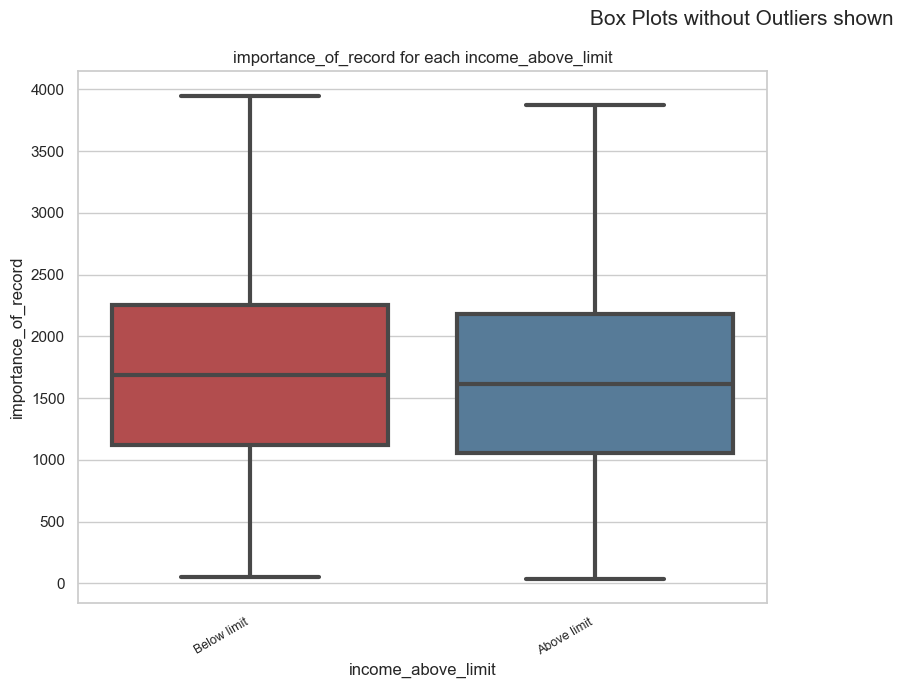

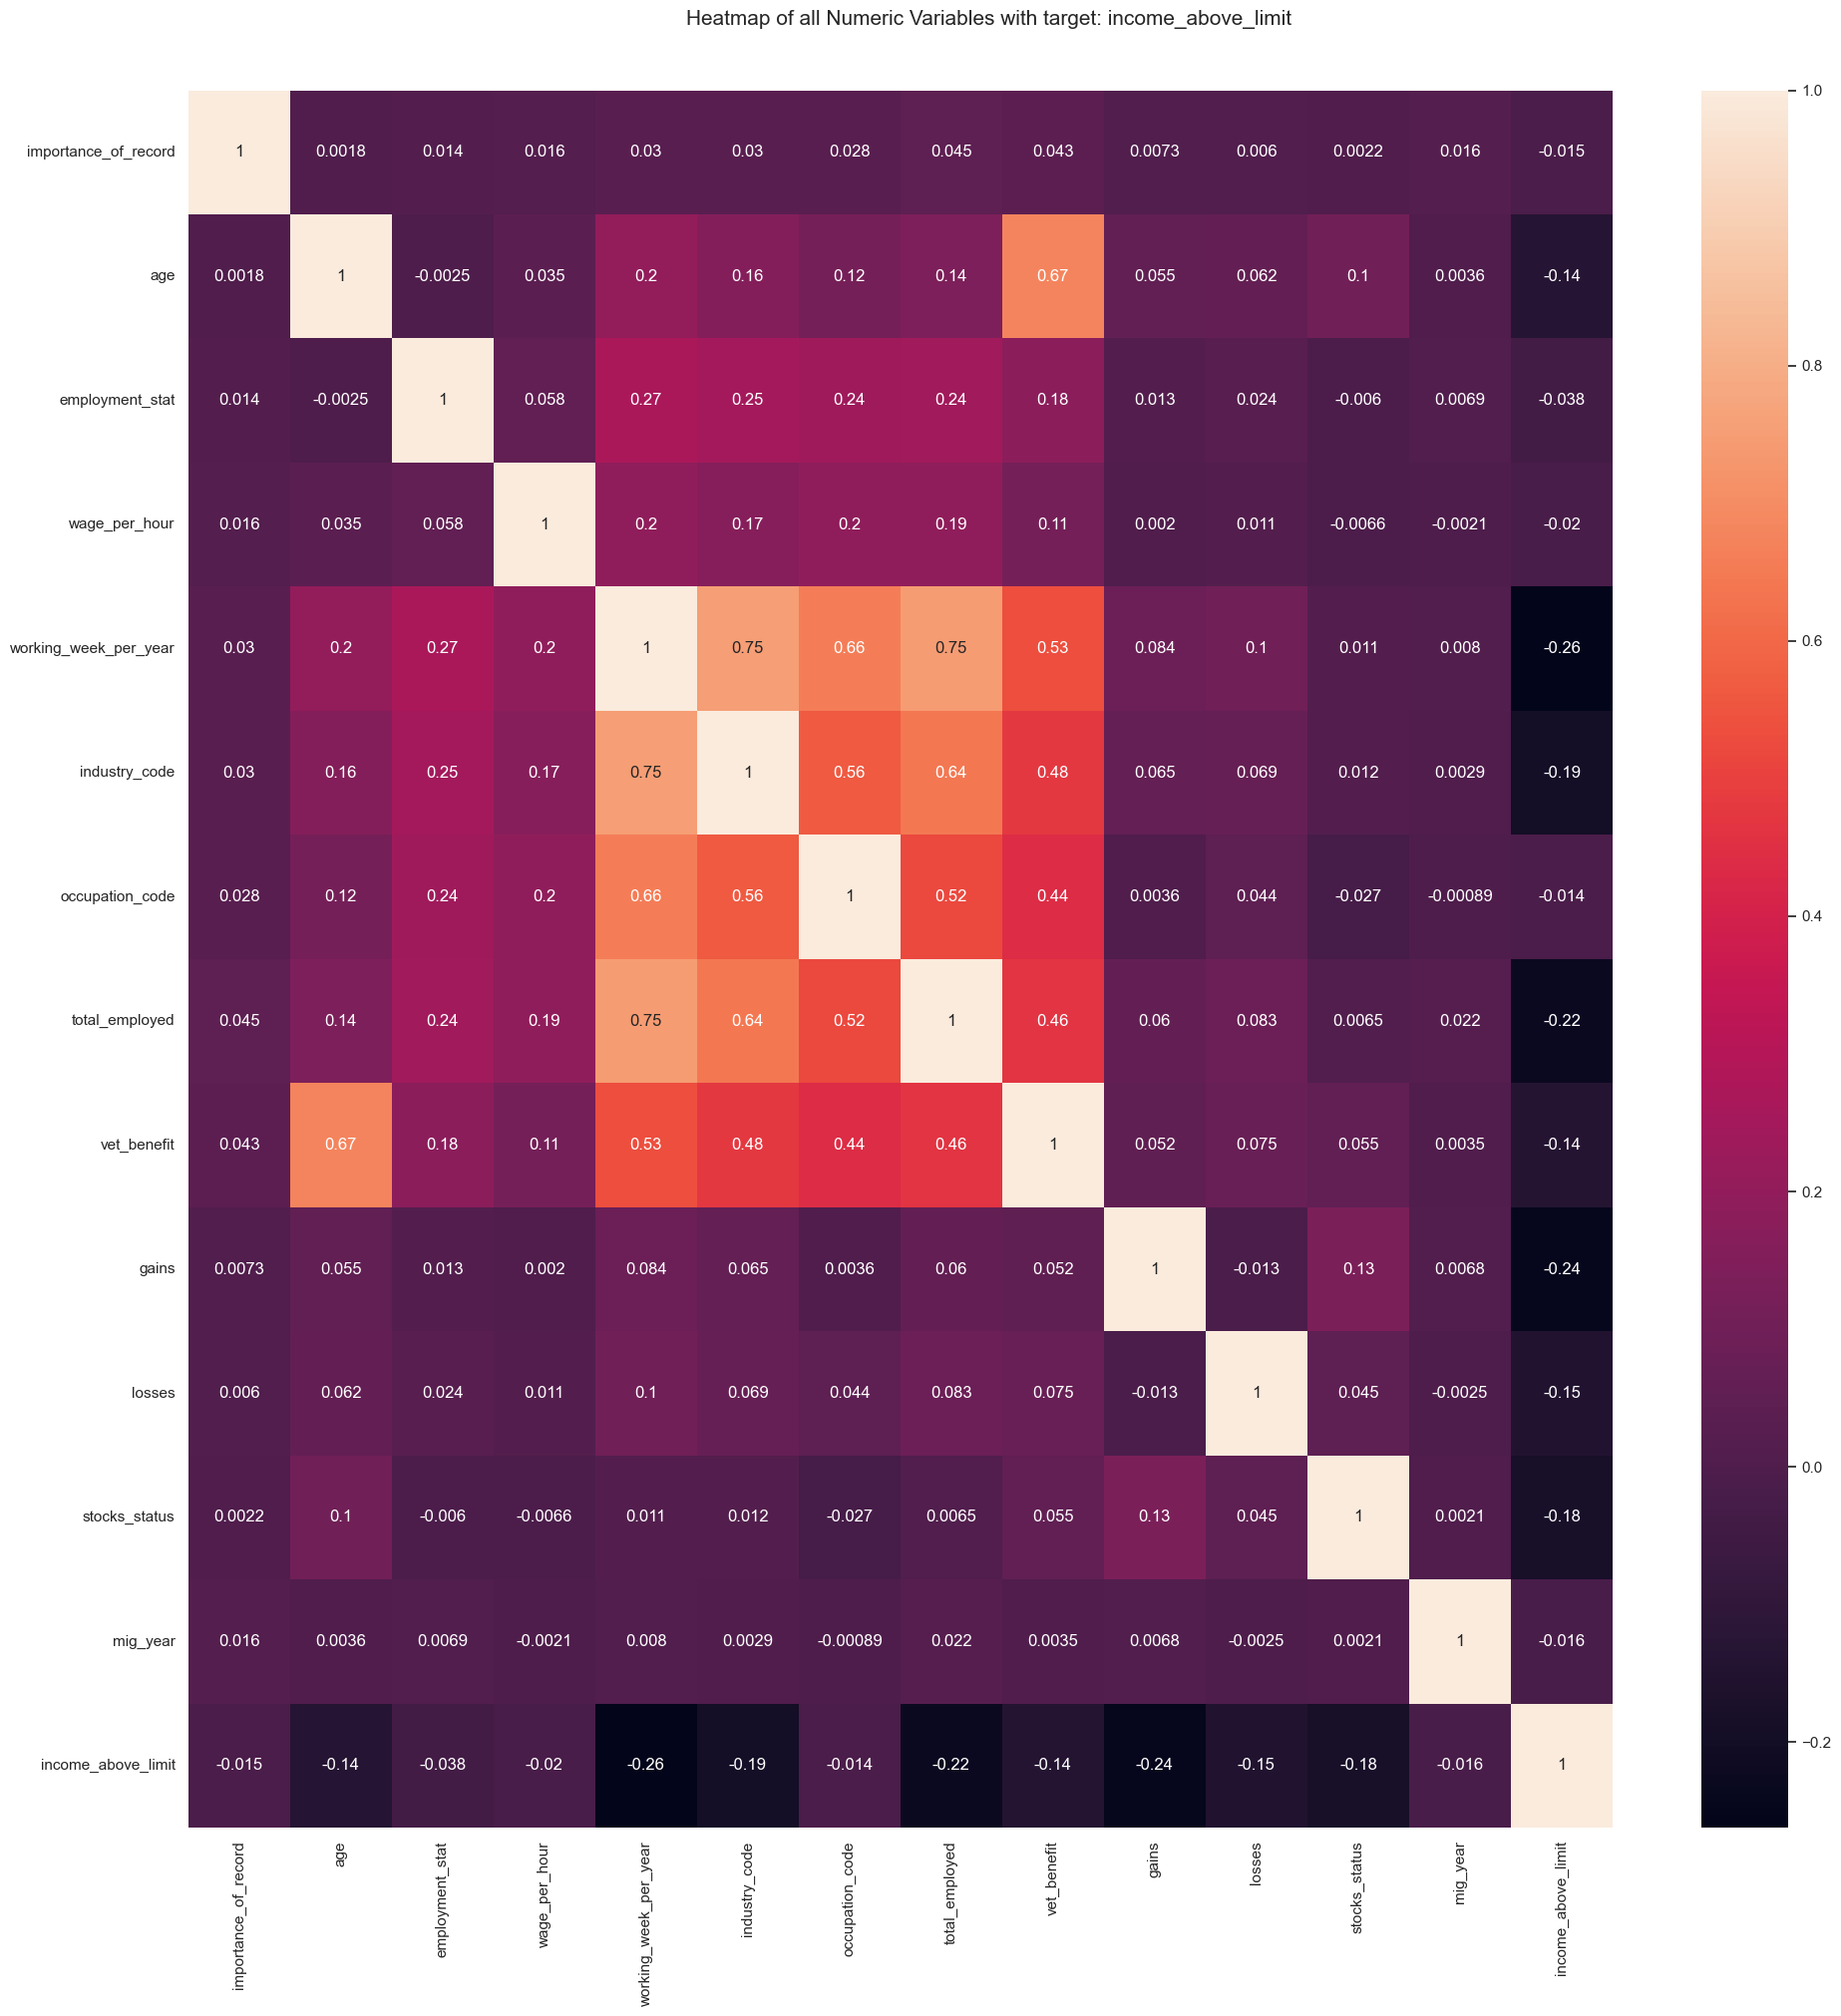

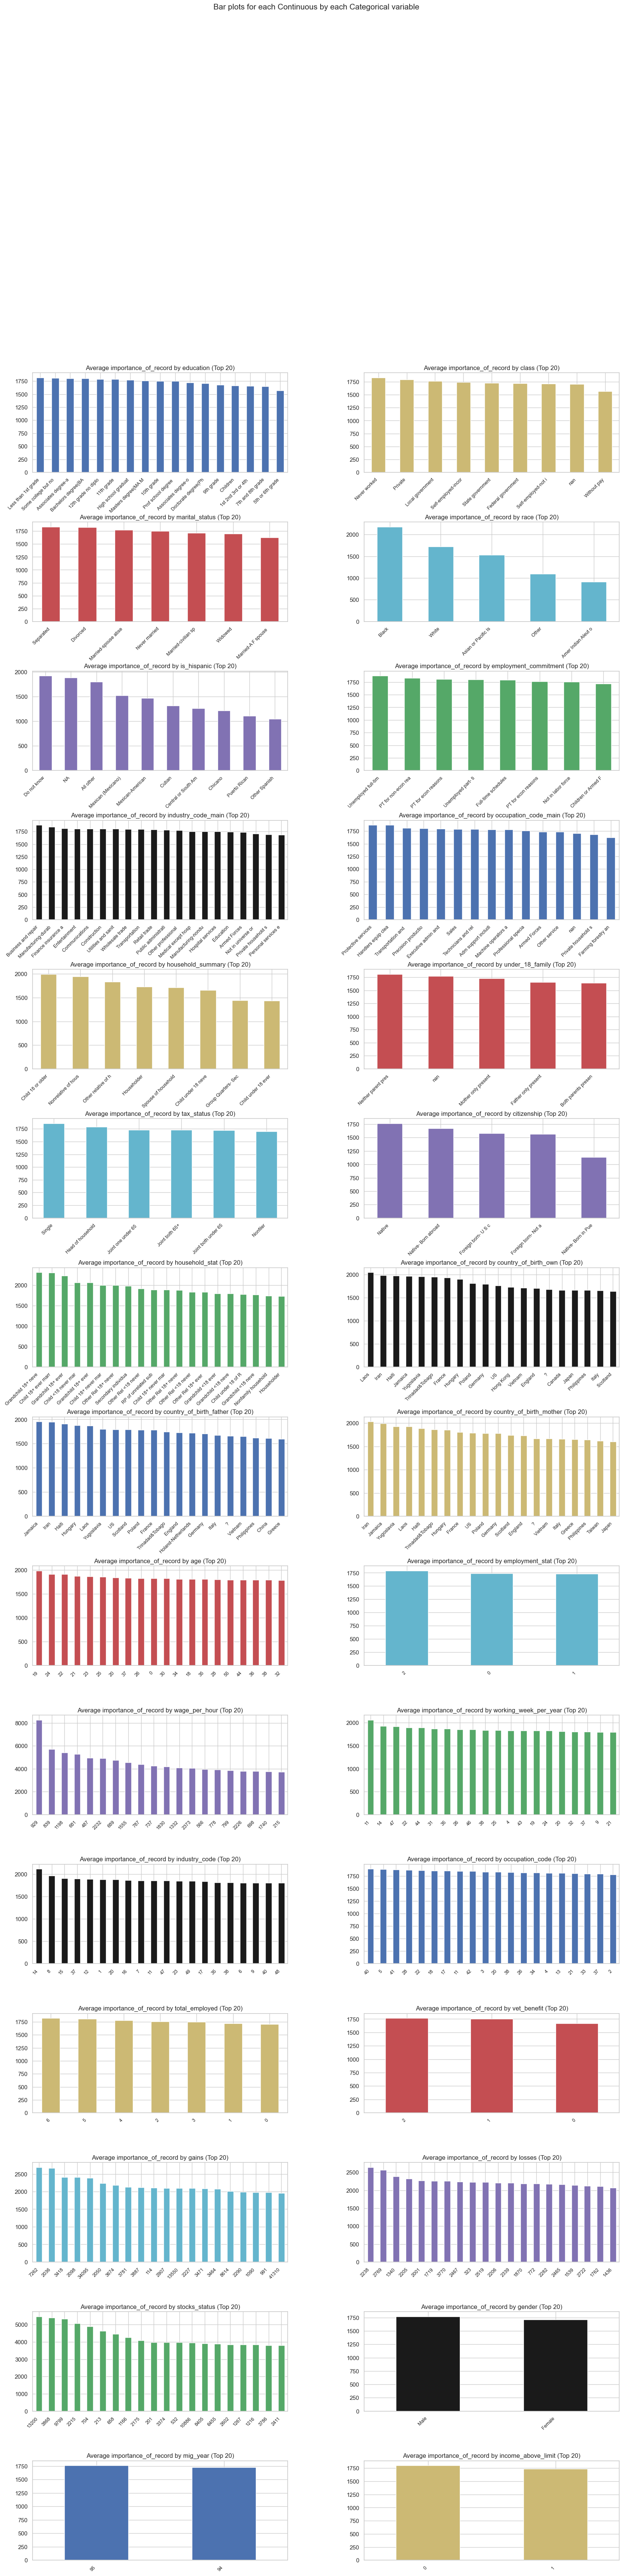

All Plots done
Time to run AutoViz = 46 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [100]:
# EDA
from autoviz import AutoViz_Class
from autoviz import FixDQ

AV = AutoViz_Class()

filename = "data.csv"
target_variable = "income_above_limit"

dft = AV.AutoViz(
    filename,
    sep=",",
    depVar=target_variable,
    dfte=None,
    header=0,
    verbose=1,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
    save_plot_dir=None
)

In [ ]:
%matplotlib inline
df.hist(figsize=(12,12))
plt.show()

In [150]:
df.describe(include='object')

ID      gender        education          class    \
count      209499   209499                 209499    104254   
unique     209499        2                     17         8   
top     ID_TZ0000   Female   High school graduate   Private   
freq            1   108784                  50627     75617   

       education_institute  marital_status   race  is_hispanic  \
count             13302             209499  209499      209499   
unique                2                  7       5          10   
top         High school      Never married   White   All other   
freq               7247              90723  175709      180404   

         employment_commitment    unemployment_reason is_labor_union  \
count                      209499               6520       20079       
unique                          8                  5           2       
top      Children or Armed Forces    Other job loser          No       
freq                       129789               2242       16968       

             industry_code_main            occupation_code_main        \
count                         209499                           103805   
unique                            24                               14   
top      Not in universe or children   Adm support including clerical   
freq                          105694                            15351   

       household_stat household_summary    under_18_family      \
count         209499           209499                    57845   
unique            38                8                        4   
top      Householder      Householder     Both parents present   
freq           56195            79470                    40875   

       veterans_admin_questionnaire tax_status citizenship  \
count              2084                 209499    209499     
unique                2                      6         5     
top                  No               Nonfiler    Native     
freq               1684                  78671    185669     

       country_of_birth_own country_of_birth_father country_of_birth_mother  \
count         205832                 202318                  202983           
unique            42                     42                      42           
top               US                     US                      US           
freq          185666                 166968                  168233           

       migration_code_change_in_msa migration_prev_sunbelt  \
count               103215                   16351           
unique                   8                       2           
top              unchanged                      No           
freq                 86864                   10298           

       migration_code_move_within_reg migration_code_change_in_reg  \
count                103215                        103215            
unique                    8                             7            
top               unchanged                     unchanged            
freq                  86864                         86864            

       residence_1_year_ago old_residence_reg old_residence_state  \
count         103215               16351                 15610      
unique             2                   5                    49      
top             Same               South            California      
freq           86864                5056                  1849      

       income_above_limit  
count           209499     
unique               2     
top        Below limit     
freq            196501

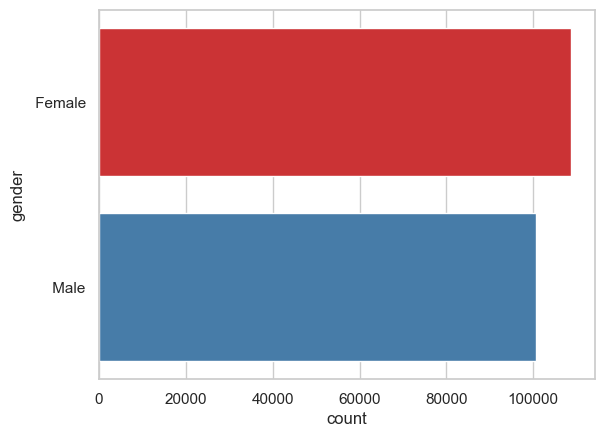

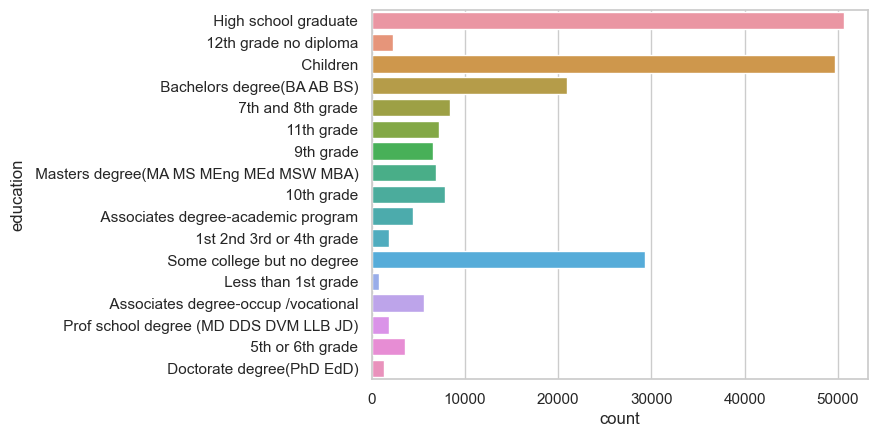

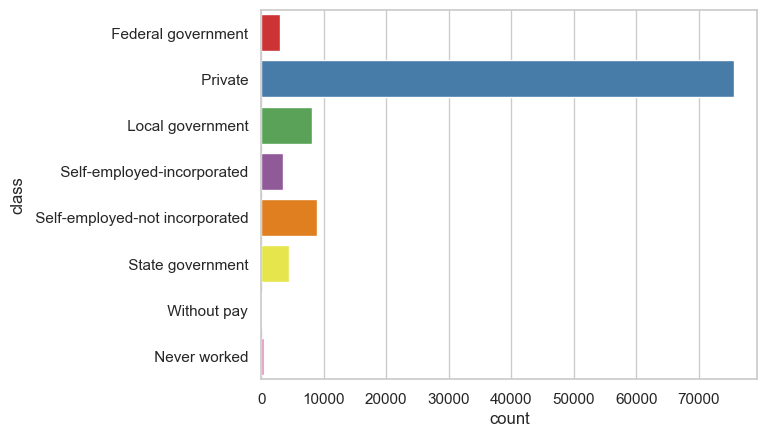

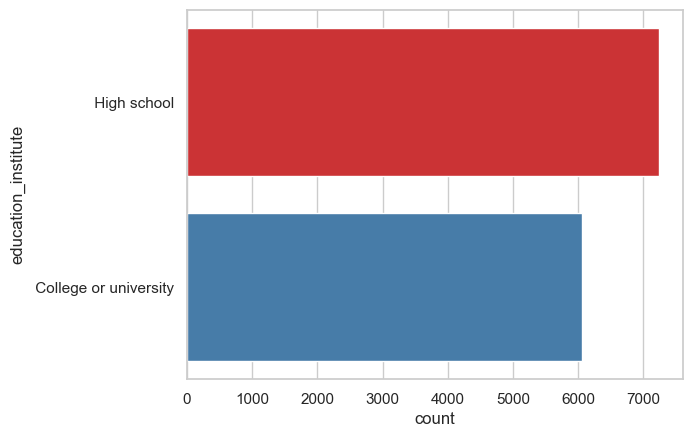

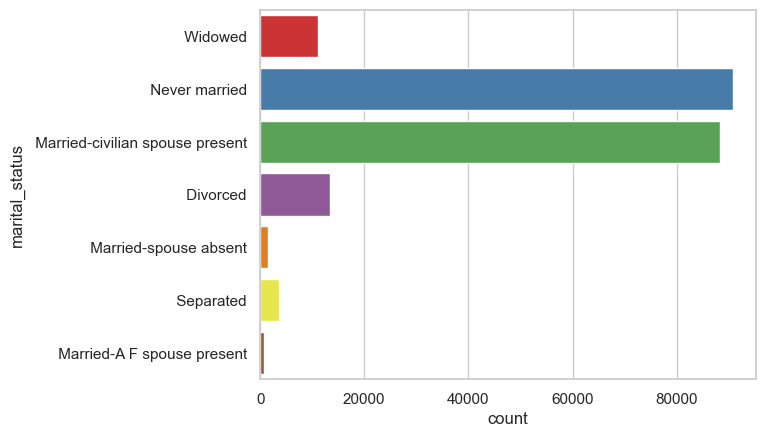

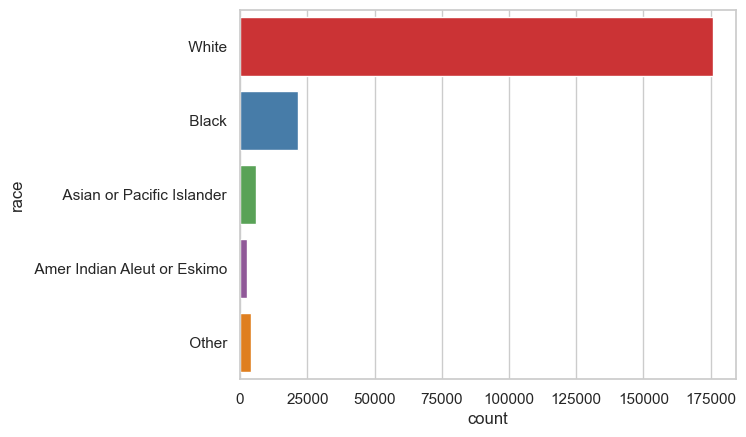

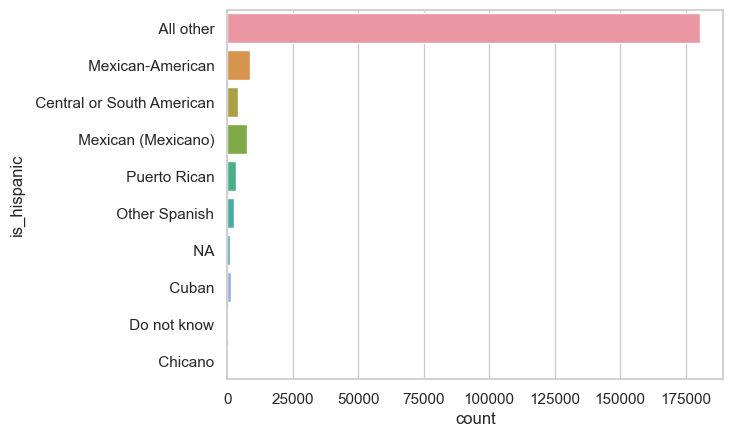

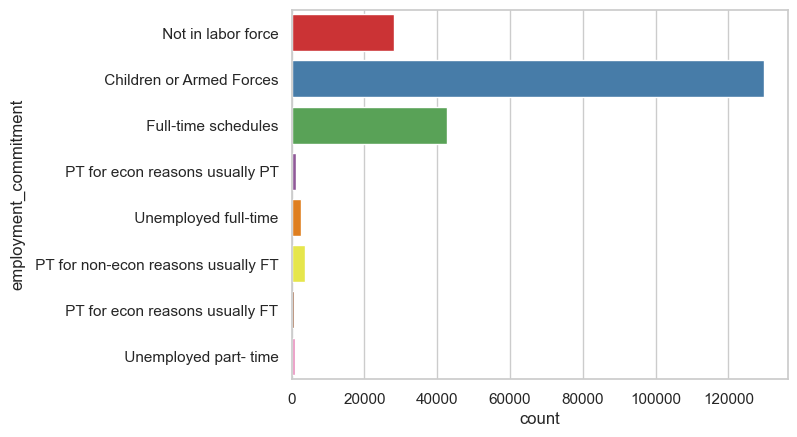

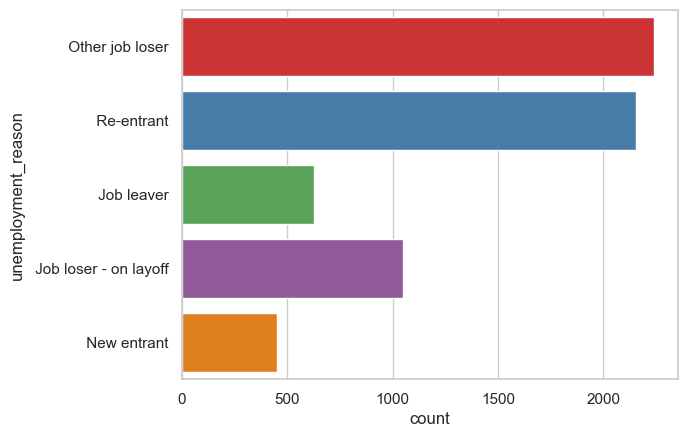

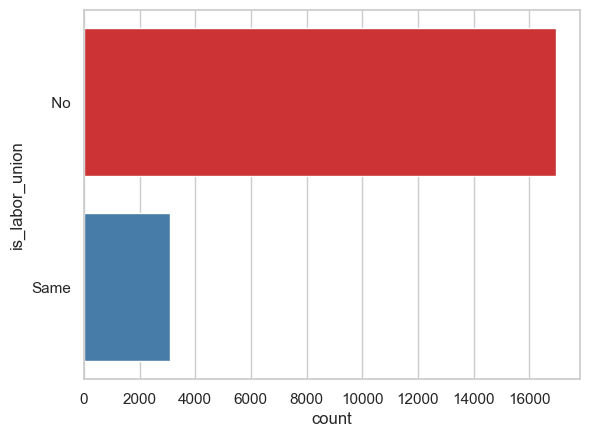

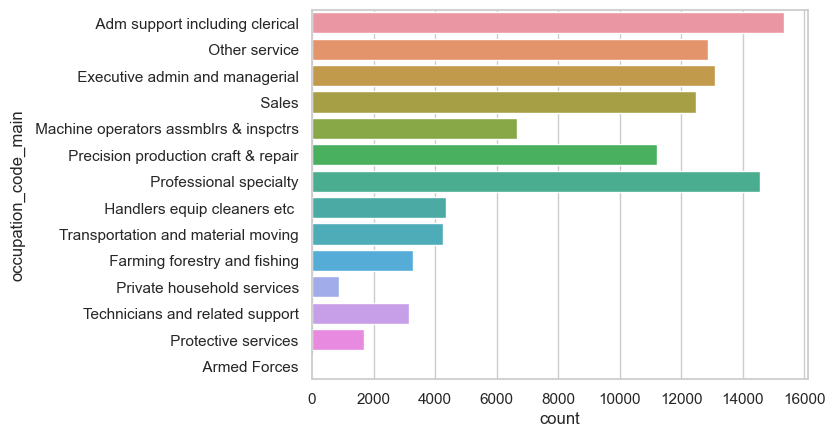

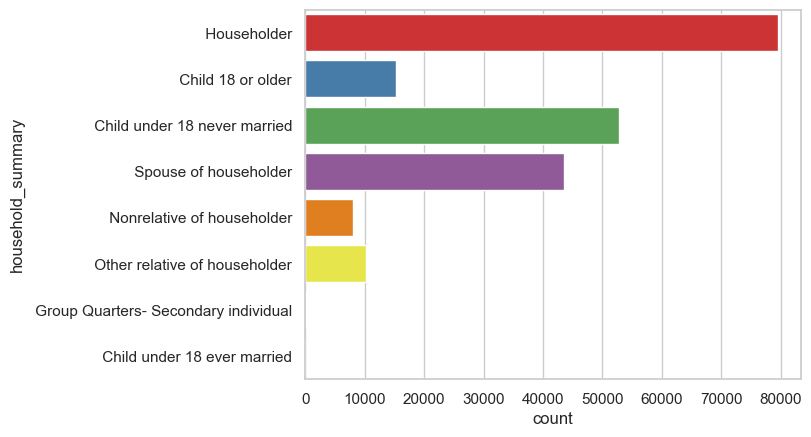

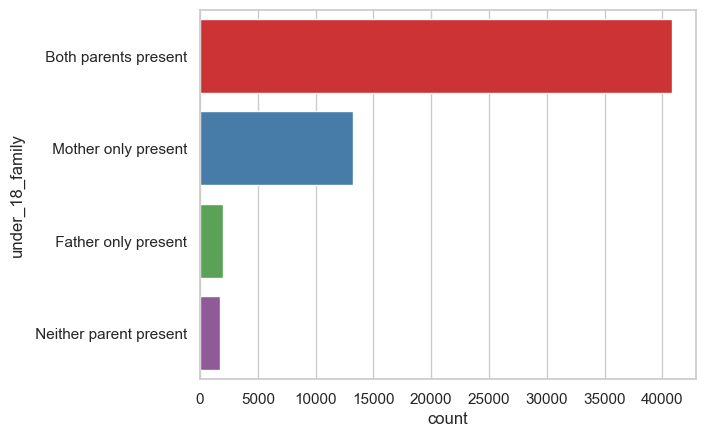

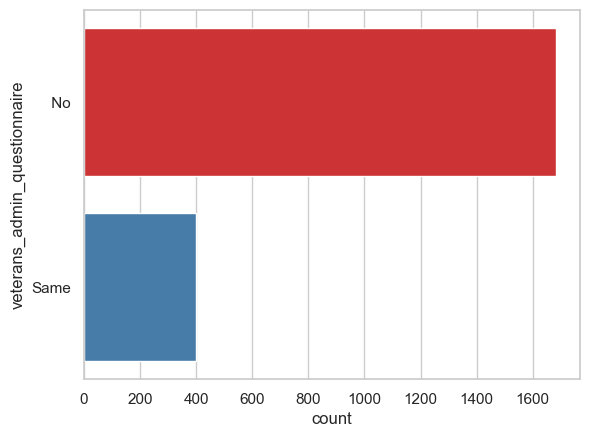

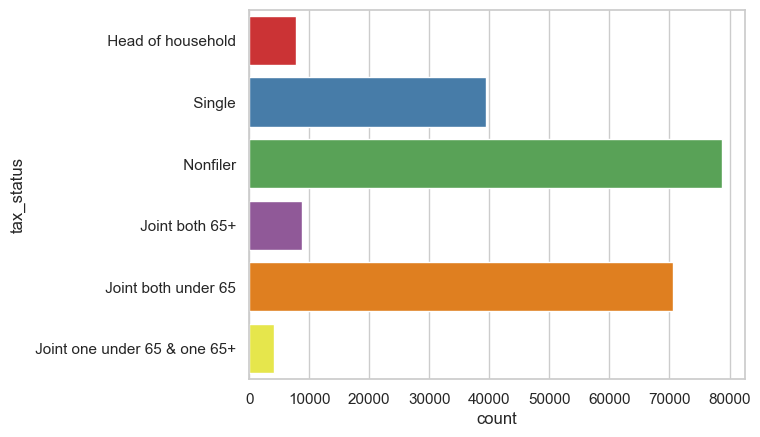

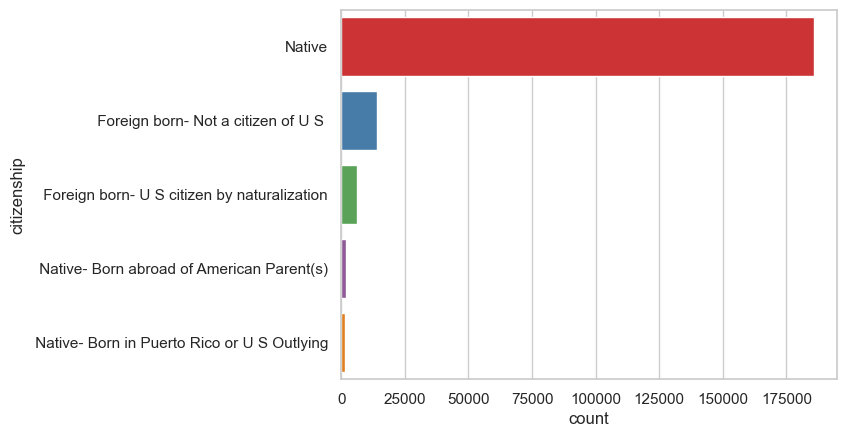

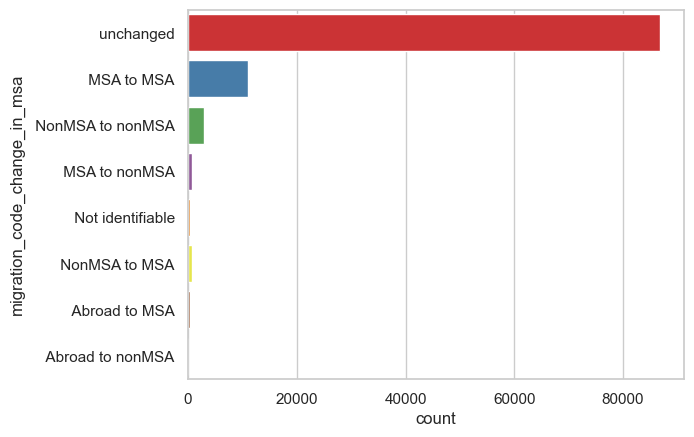

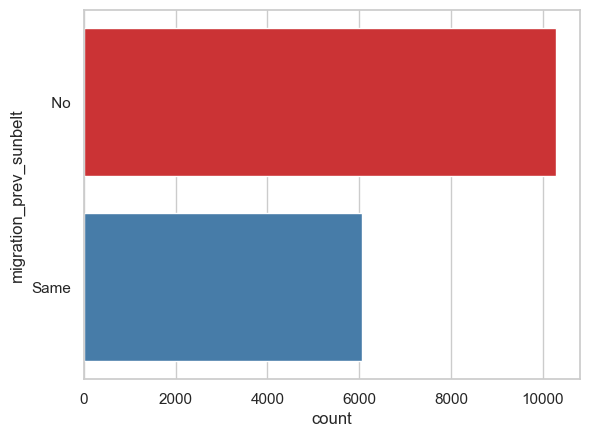

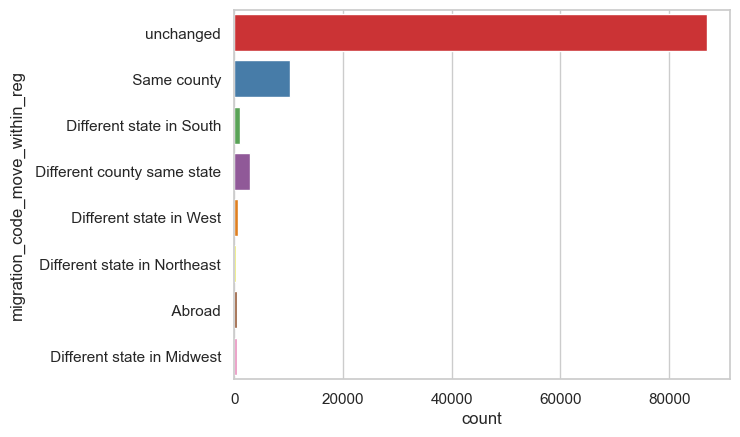

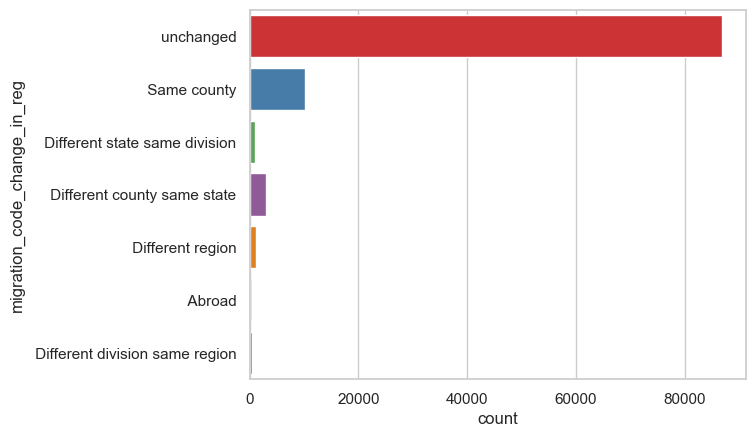

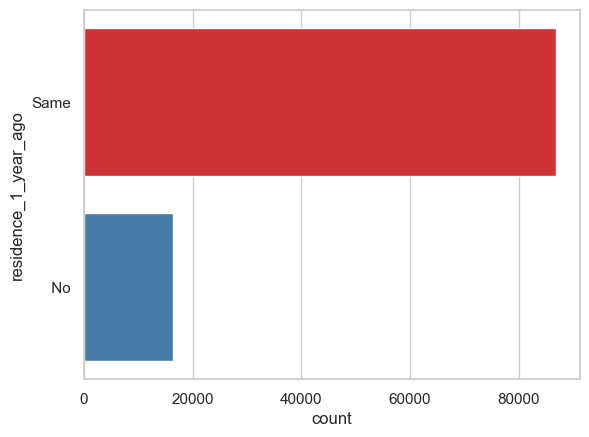

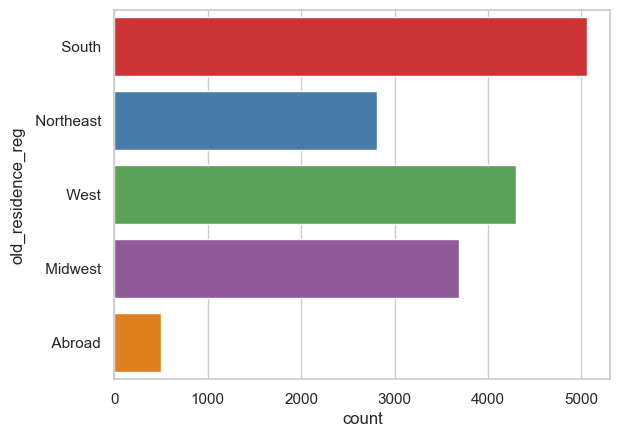

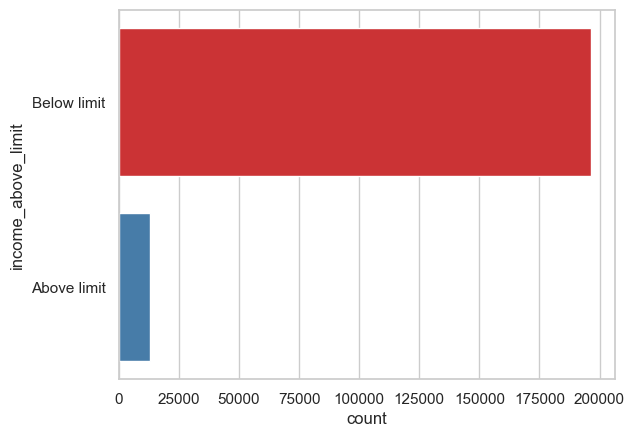

In [151]:
for col in df.select_dtypes(include='object'):
    if df[col].nunique() <= 22:
        sns.countplot(y=col, data=df)
        plt.show()

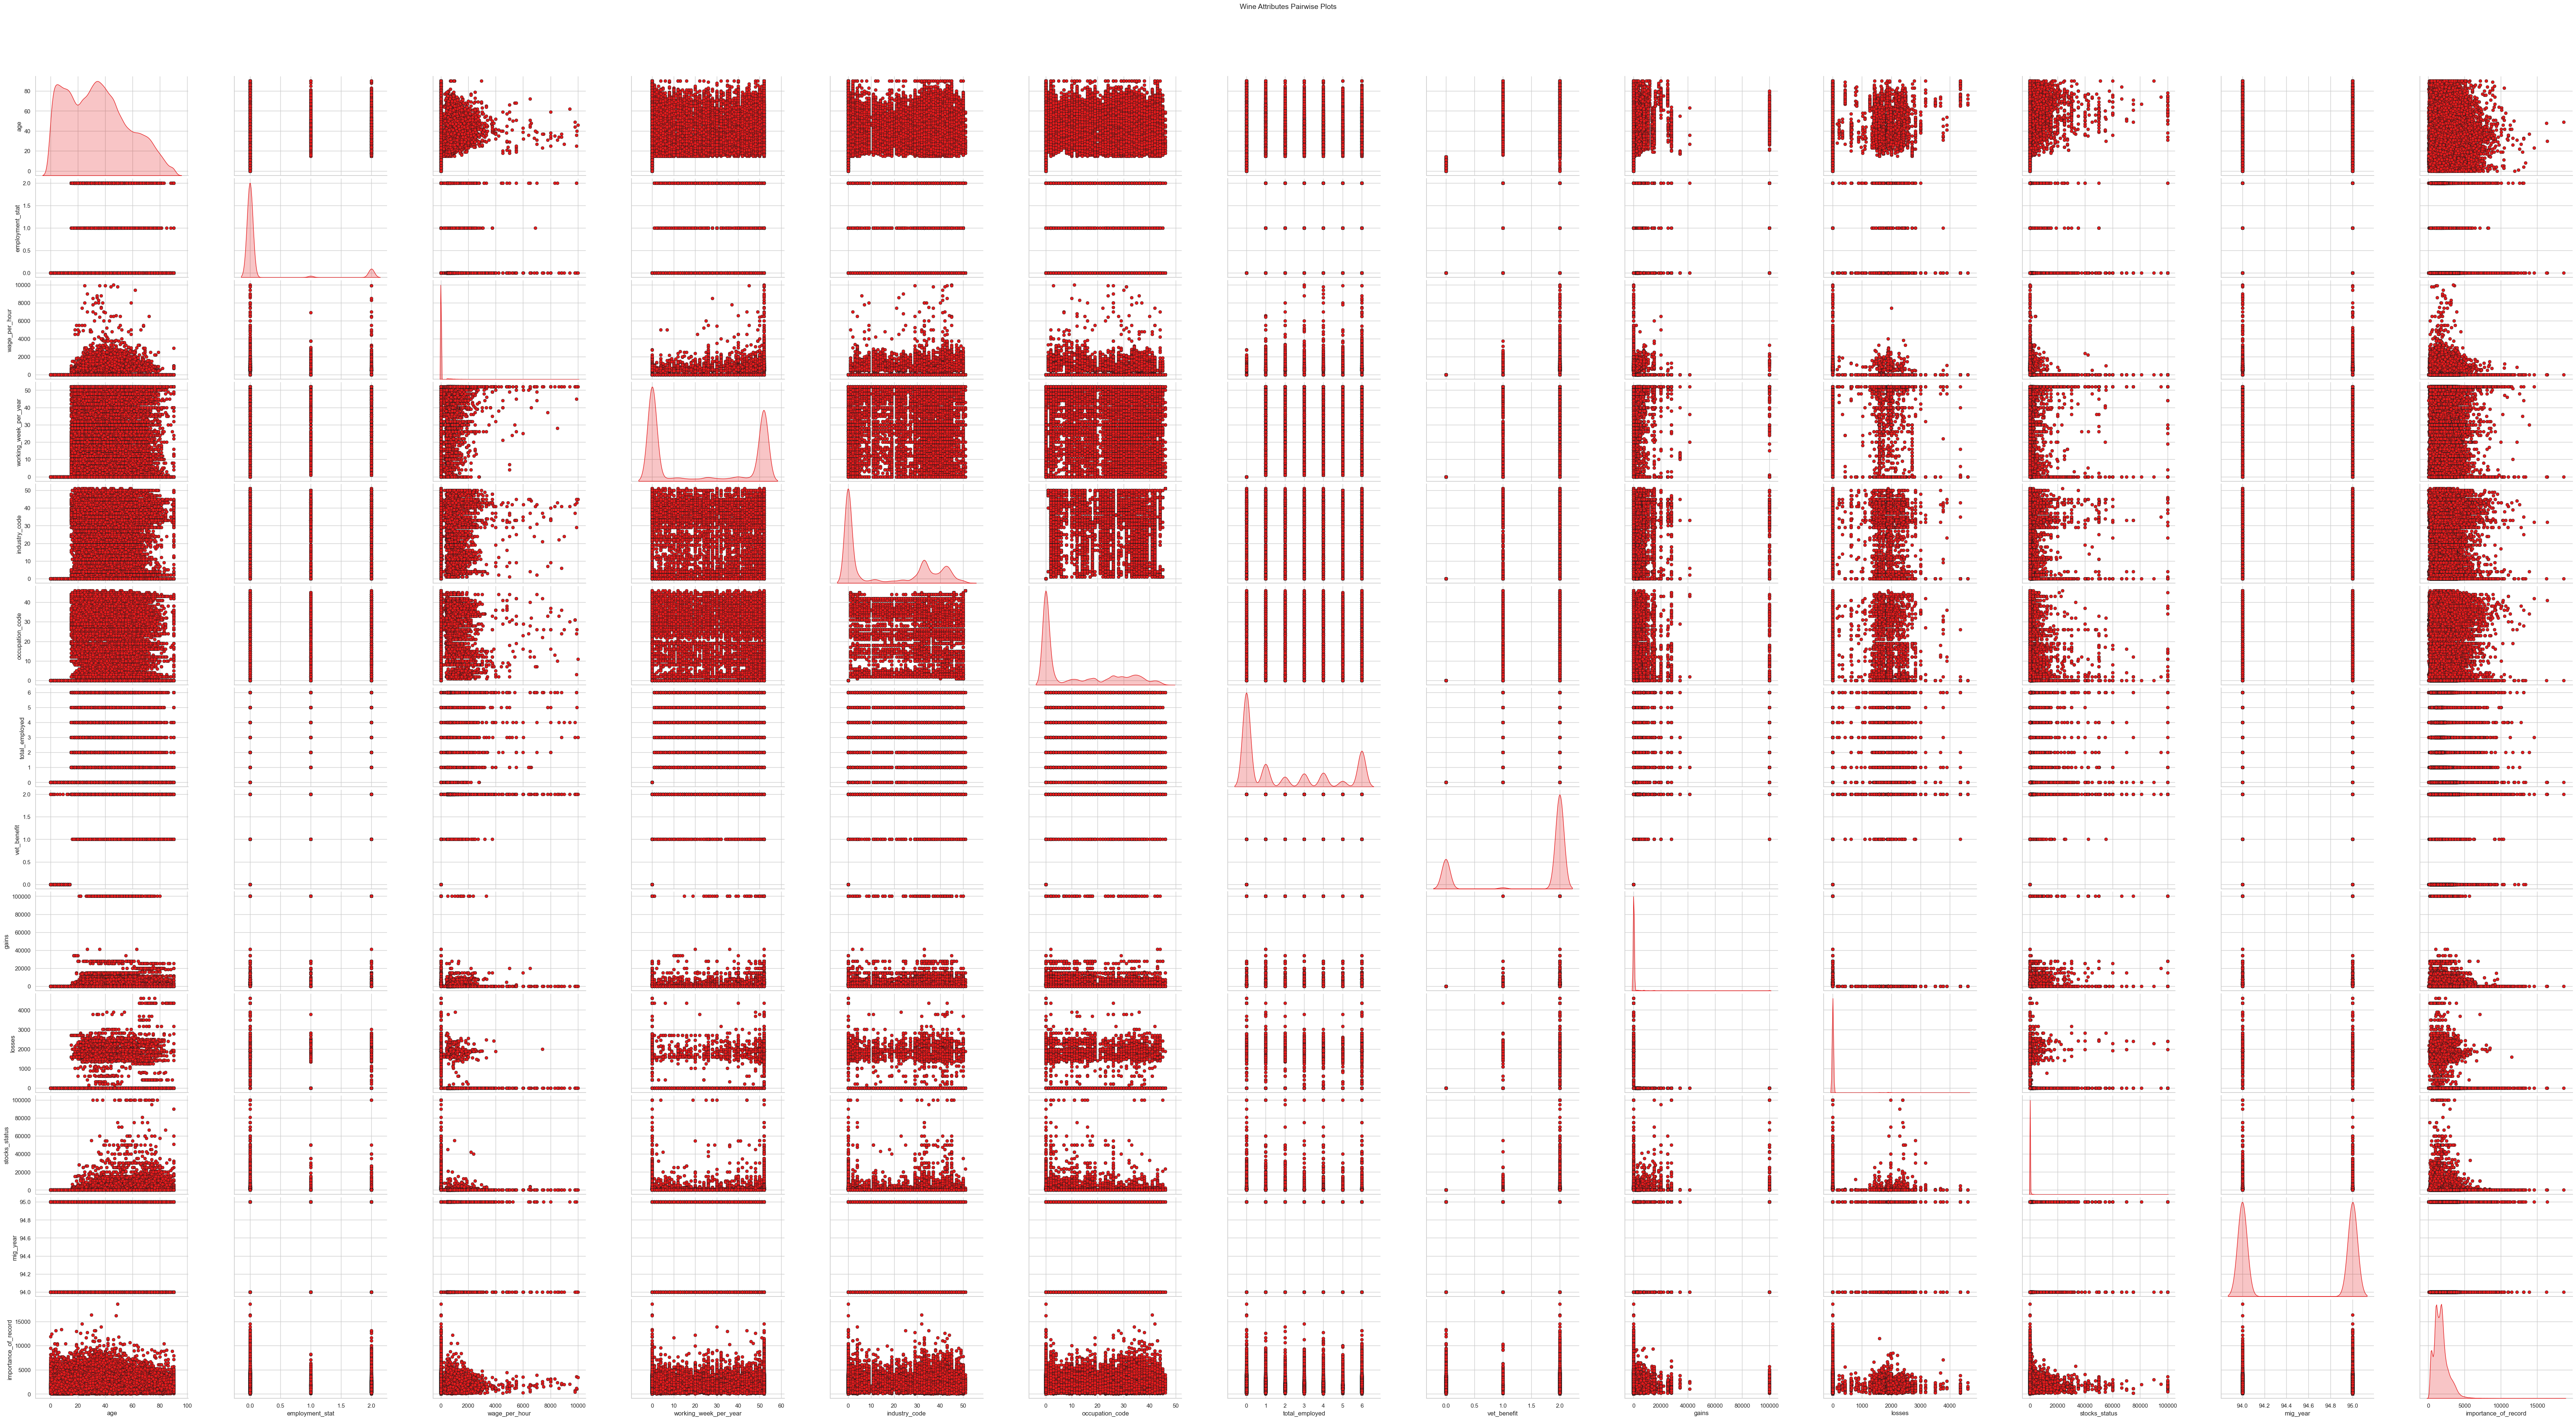

In [102]:
# Pair-wise Scatter Plots
cols =['age', 'employment_stat', 'wage_per_hour', 'working_week_per_year',
       'industry_code', 'occupation_code', 'total_employed', 'vet_benefit',
       'gains', 'losses', 'stocks_status', 'mig_year', 'importance_of_record']
pp = sns.pairplot(df[cols], size=3, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

In [152]:
# percentage of missing data in columns
missing_cols=round(df.isna().sum()*100/df.shape[0],2)
missing_cols

ID                                 0.00
age                                0.00
gender                             0.00
education                          0.00
class                             50.24
education_institute               93.65
marital_status                     0.00
race                               0.00
is_hispanic                        0.00
employment_commitment              0.00
unemployment_reason               96.89
employment_stat                    0.00
wage_per_hour                      0.00
is_labor_union                    90.42
working_week_per_year              0.00
industry_code                      0.00
industry_code_main                 0.00
occupation_code                    0.00
occupation_code_main              50.45
total_employed                     0.00
household_stat                     0.00
household_summary                  0.00
under_18_family                   72.39
veterans_admin_questionnaire      99.01
vet_benefit                        0.00


In [153]:
# headings of missing value columns
missing_value_column = missing_cols[missing_cols > 1].keys()
print(missing_value_column)


Index(['class', 'education_institute', 'unemployment_reason', 'is_labor_union',
       'occupation_code_main', 'under_18_family',
       'veterans_admin_questionnaire', 'country_of_birth_own',
       'country_of_birth_father', 'country_of_birth_mother',
       'migration_code_change_in_msa', 'migration_prev_sunbelt',
       'migration_code_move_within_reg', 'migration_code_change_in_reg',
       'residence_1_year_ago', 'old_residence_reg', 'old_residence_state'],
      dtype='object')


In [154]:
# columns to drop having more missing values
columns_to_drop=['class', 'education_institute', 'unemployment_reason', 'is_labor_union',
       'occupation_code_main', 'under_18_family',
       'veterans_admin_questionnaire', 'migration_prev_sunbelt',
       'residence_1_year_ago', 'old_residence_reg', 'old_residence_state']
after_col_drop=df.drop(columns_to_drop,axis=1,inplace=True)

In [155]:
# again checking the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   marital_status                  209499 non-null  object 
 5   race                            209499 non-null  object 
 6   is_hispanic                     209499 non-null  object 
 7   employment_commitment           209499 non-null  object 
 8   employment_stat                 209499 non-null  int64  
 9   wage_per_hour                   209499 non-null  int64  
 10  working_week_per_year           209499 non-null  int64  
 11  industry_code                   209499 non-null  int64  
 12  industry_code_ma

In [156]:
# again checking missing data
missing_cols=round(df.isna().sum()*100/df.shape[0],2)
missing_cols

ID                                 0.00
age                                0.00
gender                             0.00
education                          0.00
marital_status                     0.00
race                               0.00
is_hispanic                        0.00
employment_commitment              0.00
employment_stat                    0.00
wage_per_hour                      0.00
working_week_per_year              0.00
industry_code                      0.00
industry_code_main                 0.00
occupation_code                    0.00
total_employed                     0.00
household_stat                     0.00
household_summary                  0.00
vet_benefit                        0.00
tax_status                         0.00
gains                              0.00
losses                             0.00
stocks_status                      0.00
citizenship                        0.00
mig_year                           0.00
country_of_birth_own               1.75


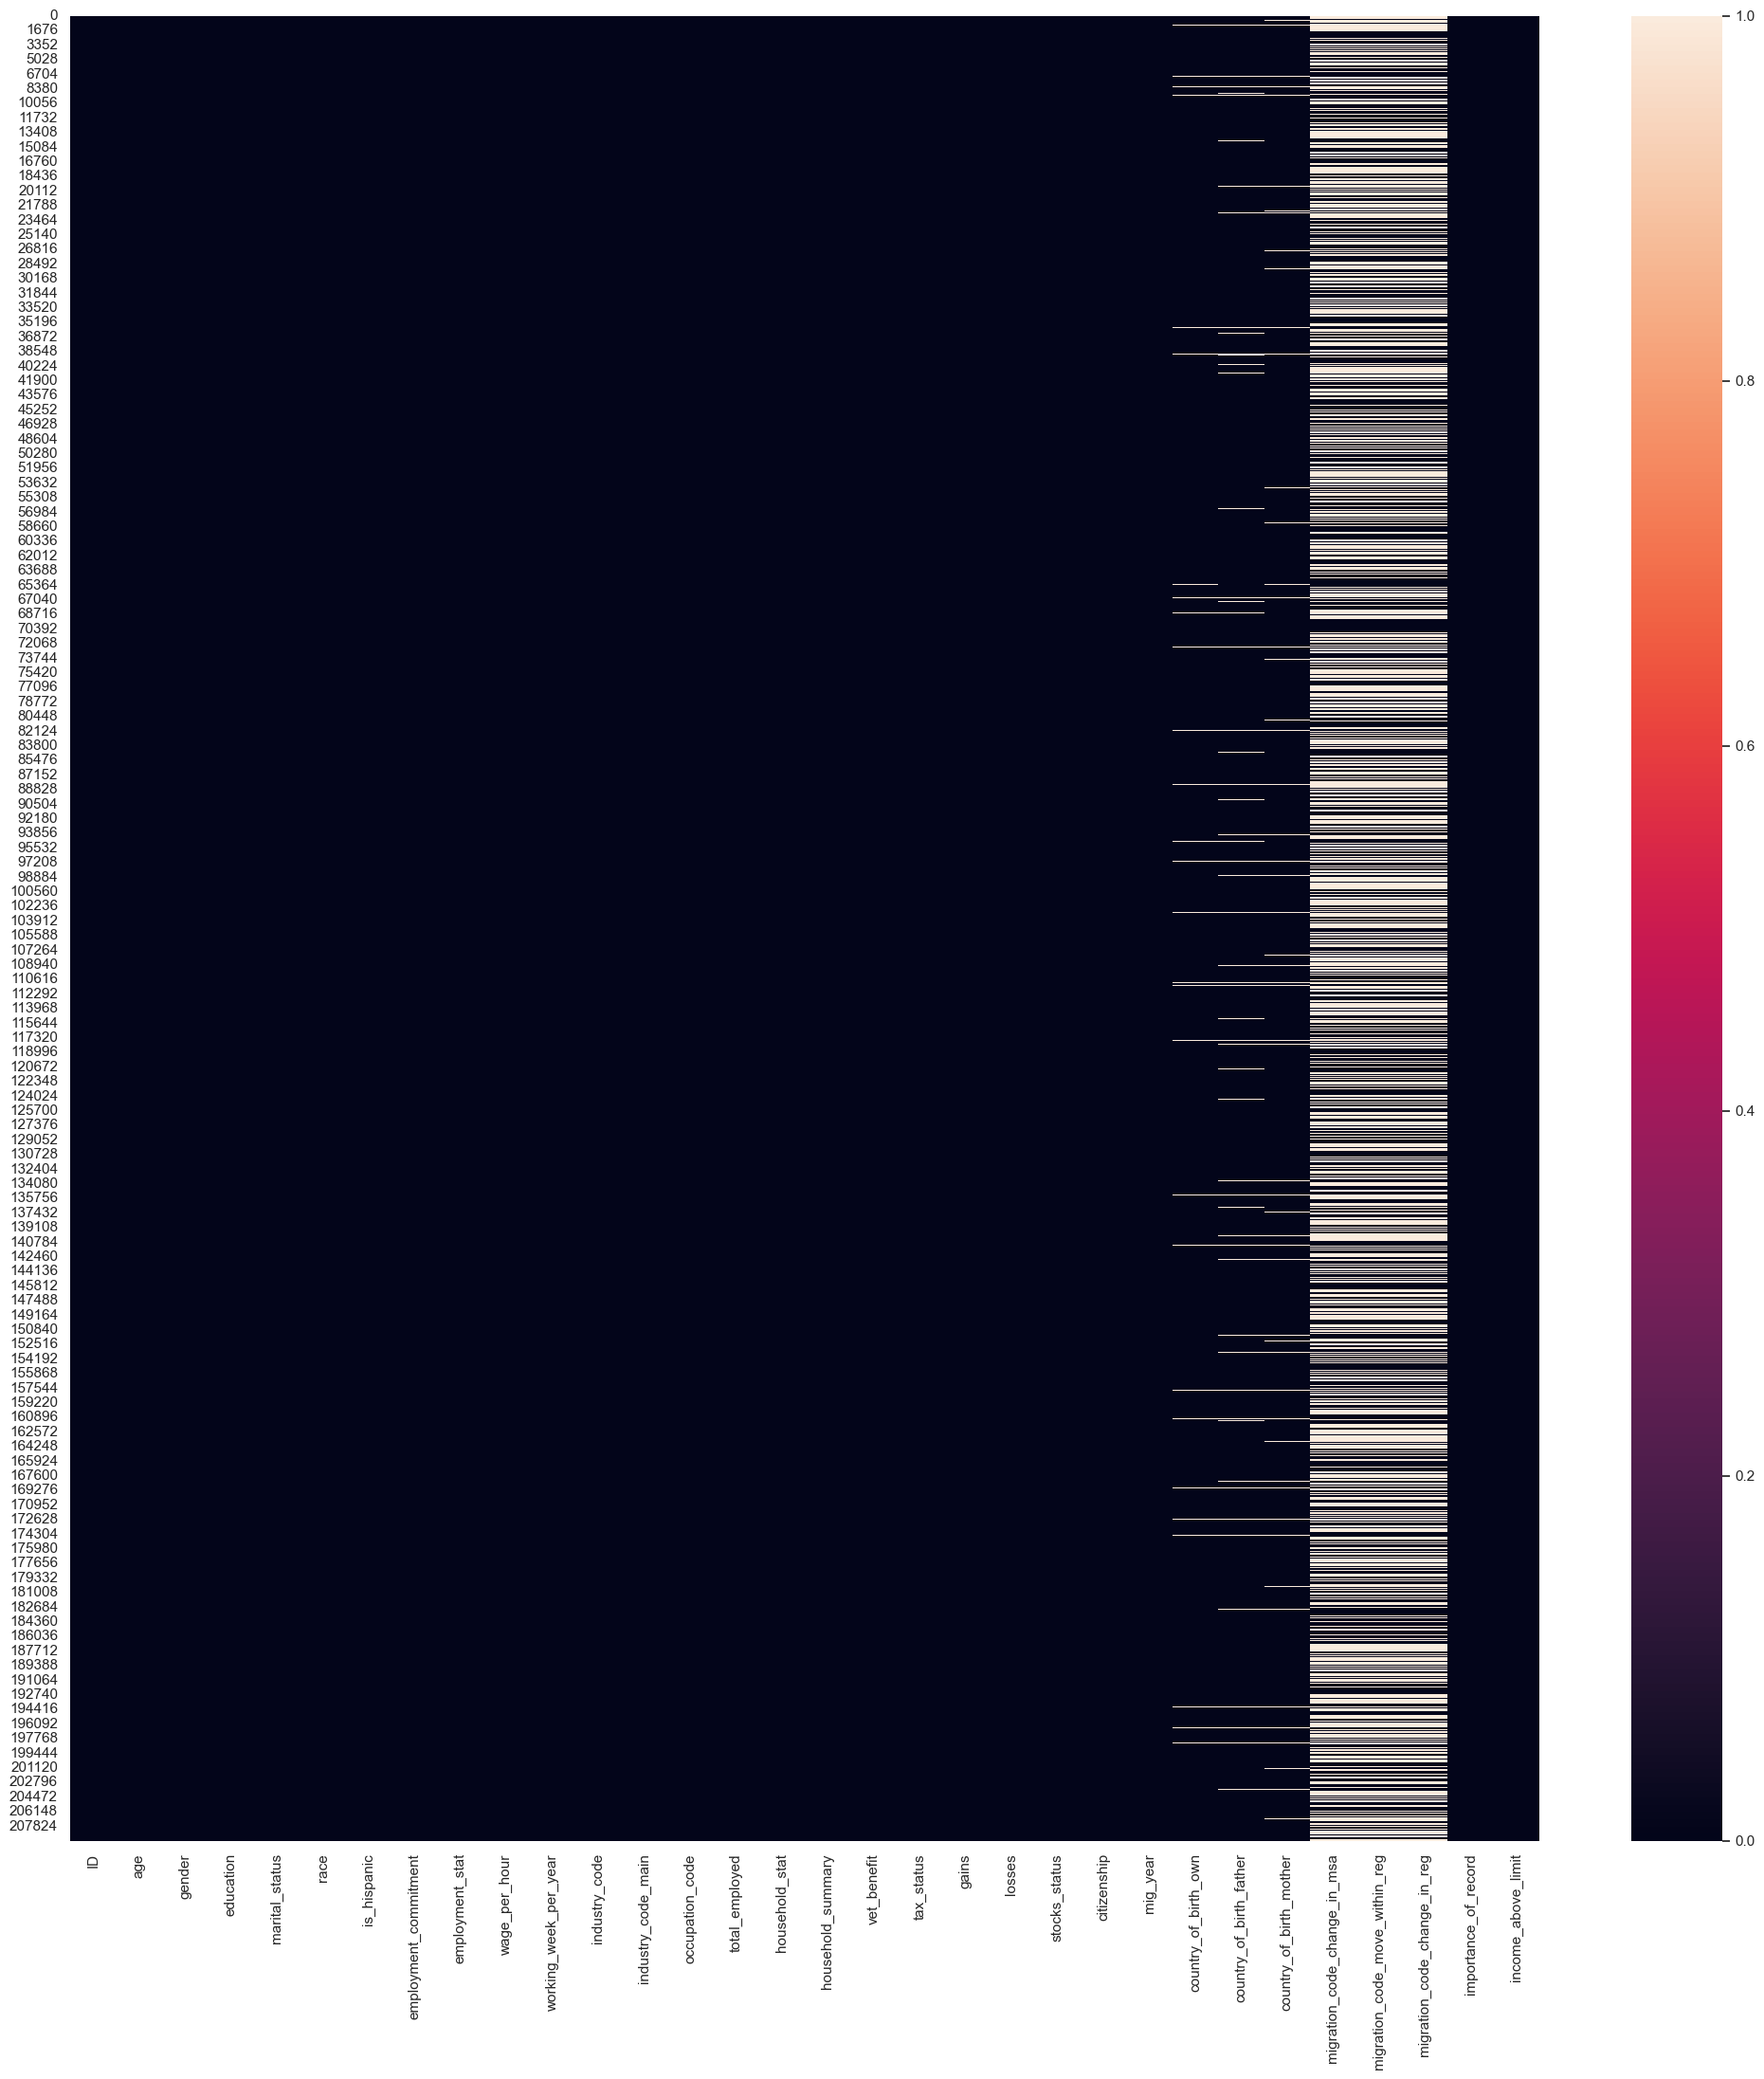

In [157]:
# checking missing values in columns graphically
plt.figure(figsize=(25,25))
sns.heatmap(df.isnull())
plt.show()

In [158]:
# droping missing rows
clean_data=df.dropna()

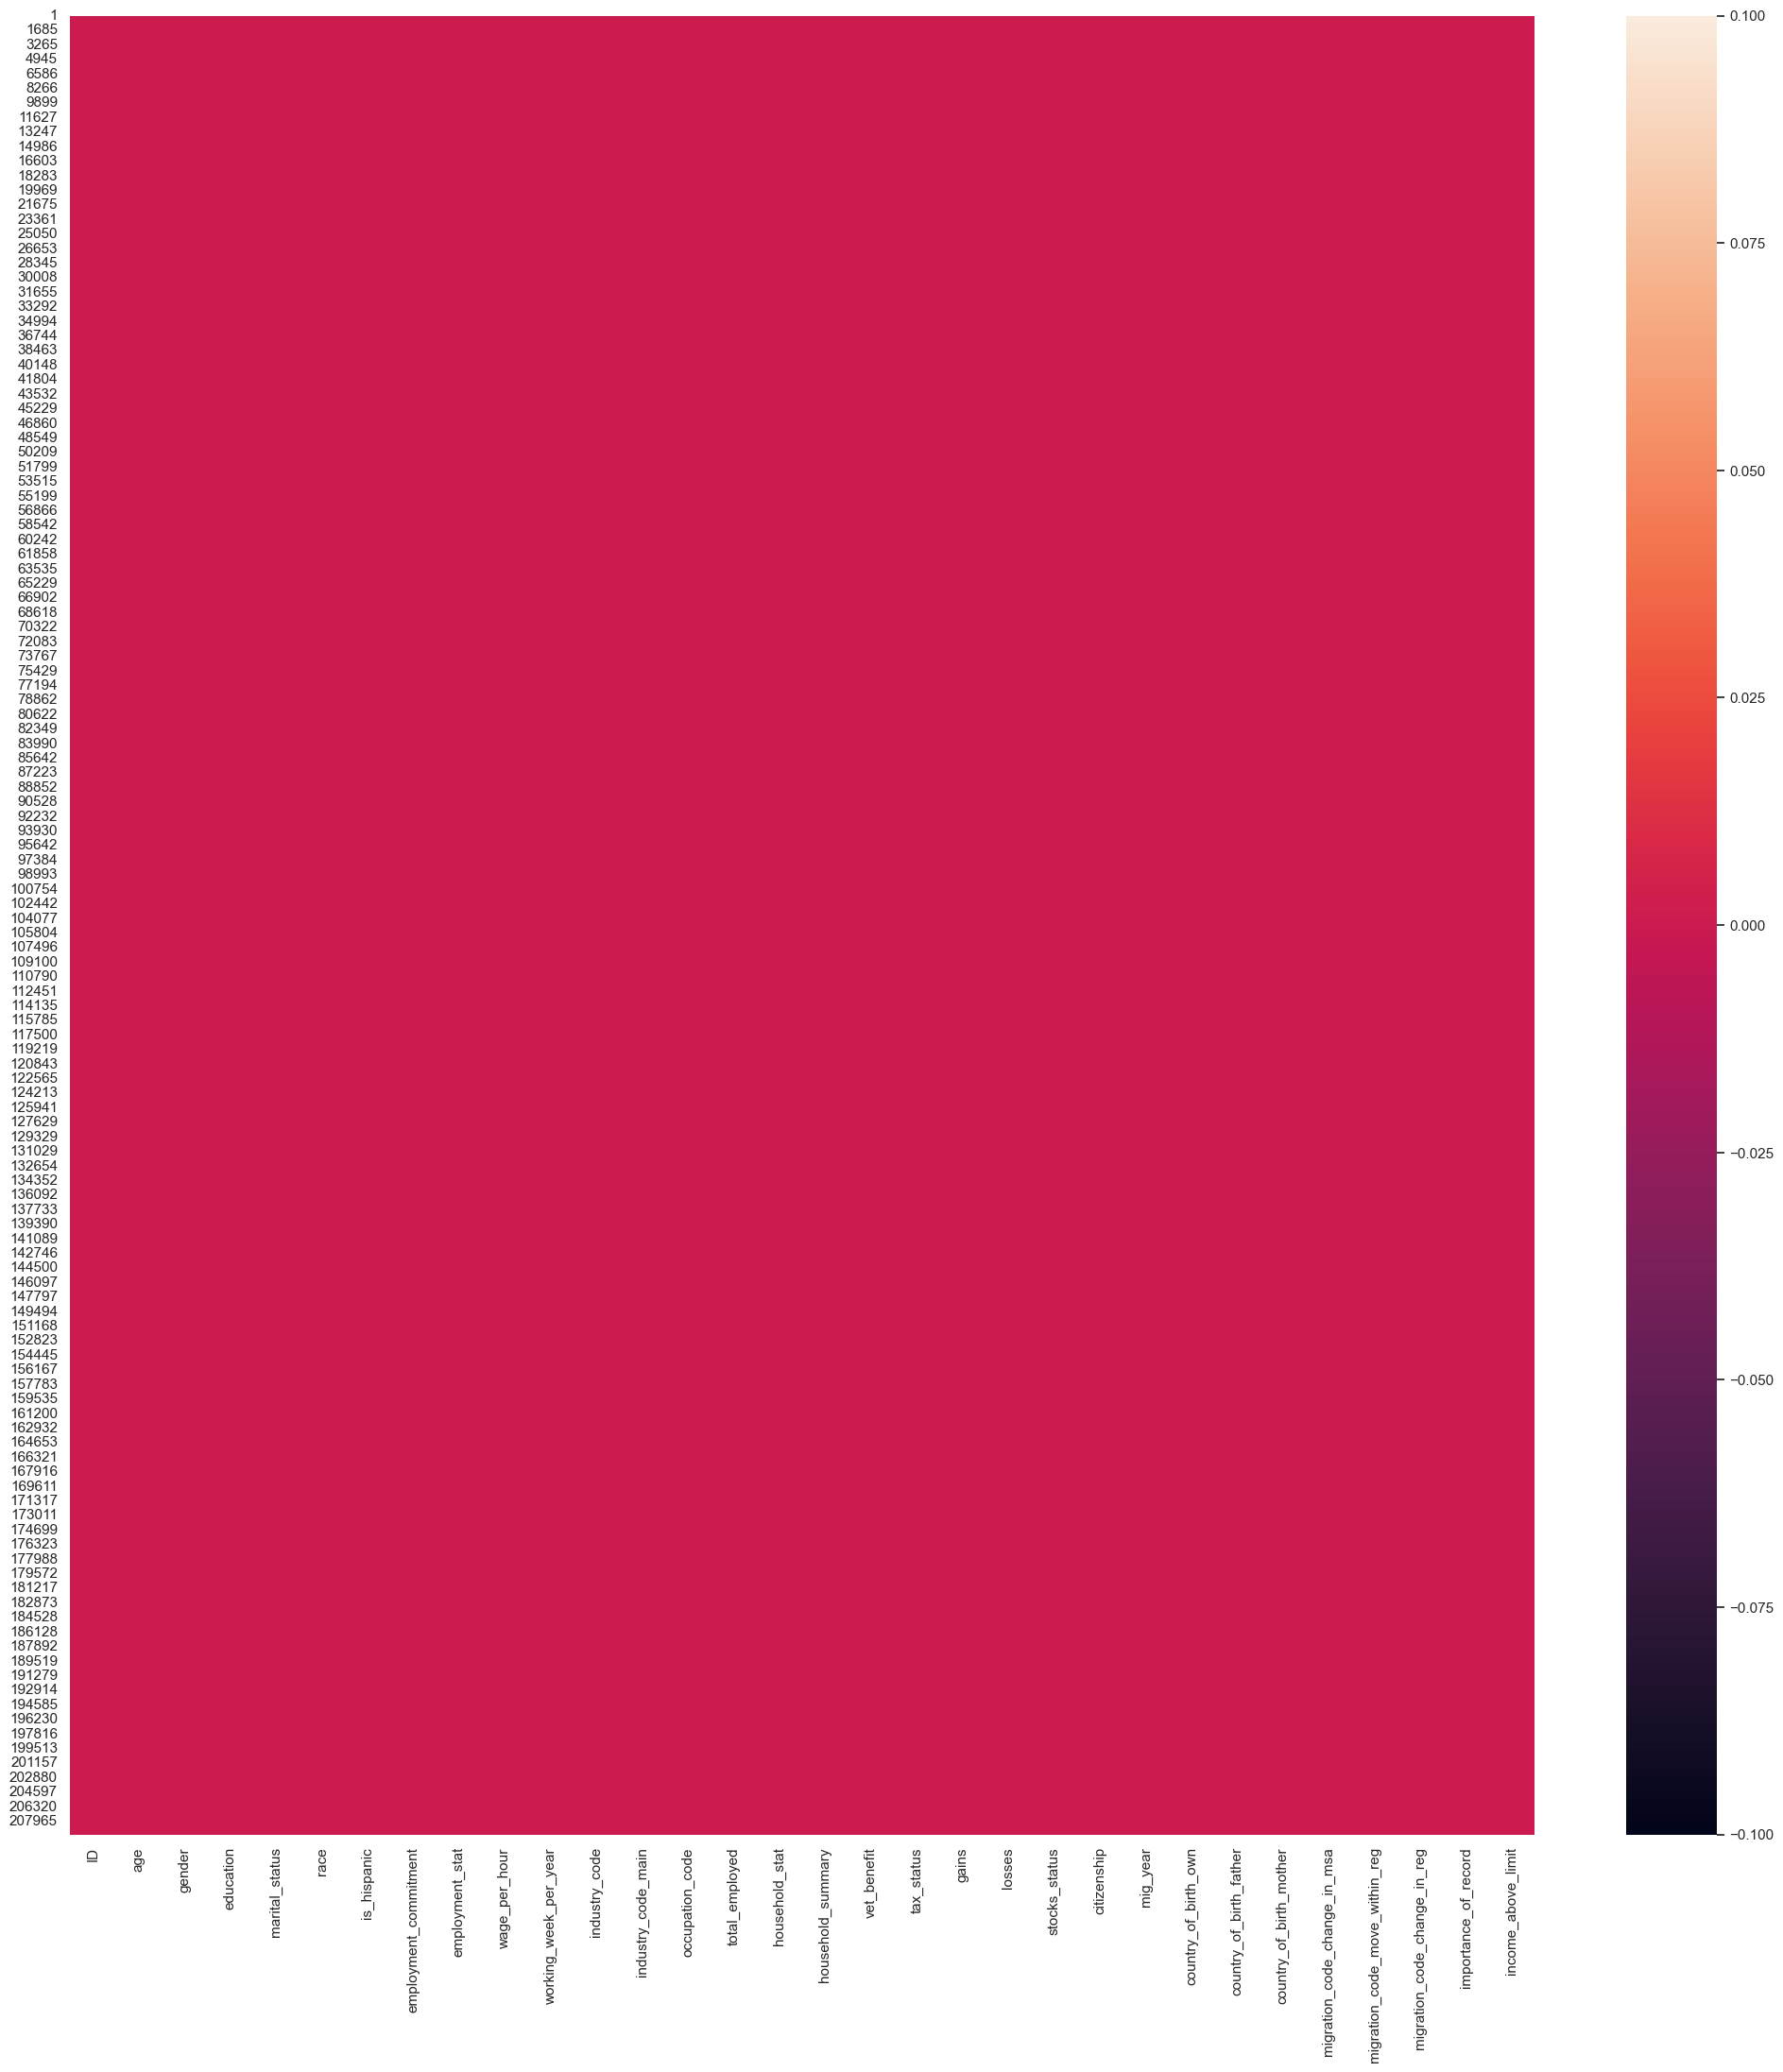

In [159]:
# again checking missing data graphically
plt.figure(figsize=(25,25))
sns.heatmap(clean_data.isnull())
plt.show()

In [160]:
clean_data.shape # checking shape of clean data

(98923, 32)

In [161]:
clean_data.select_dtypes(include=['int64','float64']).columns # columns having integer or float data

Index(['age', 'employment_stat', 'wage_per_hour', 'working_week_per_year',
       'industry_code', 'occupation_code', 'total_employed', 'vet_benefit',
       'gains', 'losses', 'stocks_status', 'mig_year', 'importance_of_record'],
      dtype='object')

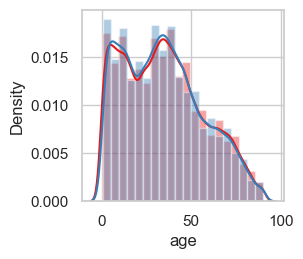

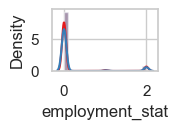

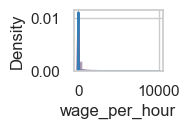

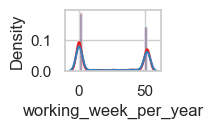

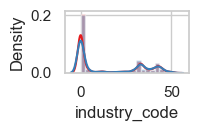

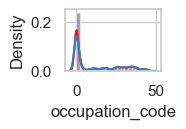

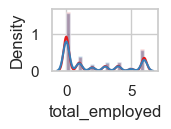

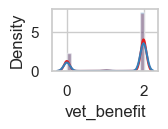

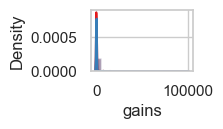

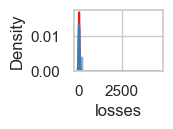

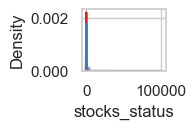

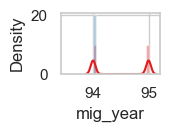

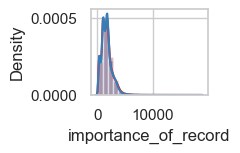

In [162]:
# comparing data graphically before droping and after droping missing data
num_var=['age', 'employment_stat', 'wage_per_hour', 'working_week_per_year',
       'industry_code', 'occupation_code', 'total_employed', 'vet_benefit',
       'gains', 'losses', 'stocks_status', 'mig_year', 'importance_of_record']
plt.figure(figsize=(10,10))
# Calculate the number of rows and columns for the subplots
num_rows = (len(num_var) + 3) // 4 # Adjust the number of columns as needed
num_cols = 4
for i, var in enumerate(num_var):
    plt.subplot(num_rows, num_cols, i+1)
    sns.distplot(df[var], bins=20)
    sns.distplot(clean_data[var], bins=20)
    plt.tight_layout() # Optional: Adjusts the spacing between subplots
    plt.show()

In [ ]:
clean_data.plot(kind="box",
                vert=True,
                subplots=True,
                layout = (6,5),
                figsize=(40,40),
                sharex=False,
                sharey=False);

In [ ]:
# checking for outliers
for i in ['industry_code','working_week_per_year','wage_per_hour','employment_stat','age','occupation_code','total_employed','vet_benefit','wage_per_hour','gains','mig_year','losses','stocks_status','importance_of_record']:

    IQR=df[i].quantile(0.75)-df[i].quantile(0.25)
    lower_bridge=df[i].quantile(0.25)-(IQR*1.5)
    upper_bridge=df[i].quantile(0.75)+(IQR*1.5)

    outs = []

    for j in df[i]:
        if j<lower_bridge:
            outs.append(j)

    for k in df[i]:
        if k>upper_bridge:
            outs.append(k)

    print(f'The percentage of outliers in {i}:',(len(outs)/len(df)*100),'%')

In [163]:
# checking if the resultant variables are balanced or not
print('percentage of "income_above_limit" unique counts','\n',clean_data['income_above_limit'].value_counts())

percentage of "income_above_limit" unique counts 
 Below limit    93183
Above limit     5740
Name: income_above_limit, dtype: int64


So the data is imbalance

In [164]:
clean_data.head() # visualising data for its indices

ID      age  gender         education         marital_status  \
1   ID_TZ0001  65    Female    High school graduate         Widowed   
2   ID_TZ0002  21      Male   12th grade no diploma   Never married   
3   ID_TZ0003   2    Female                Children   Never married   
11  ID_TZ0011   4      Male                Children   Never married   
13  ID_TZ0013  16    Female               9th grade   Never married   

               race            is_hispanic   employment_commitment     \
1                        White   All other   Children or Armed Forces   
2                        Black   All other   Children or Armed Forces   
3    Asian or Pacific Islander   All other   Children or Armed Forces   
11                       Black   All other   Children or Armed Forces   
13                       White   All other   Children or Armed Forces   

    employment_stat  wage_per_hour  working_week_per_year  industry_code  \
1          0                0                 0                  0         
2          0              500                15                 41         
3          0                0                 0                  0         
11         0                0                 0                  0         
13         0                0                 0                  0         

         industry_code_main       occupation_code  total_employed  \
1    Not in universe or children         0                0         
2              Hospital services        26                4         
3    Not in universe or children         0                0         
11   Not in universe or children         0                0         
13   Not in universe or children         0                0         

                 household_stat                    household_summary         \
1                      Nonfamily householder                    Householder   
2    Child 18+ never marr Not in a subfamily              Child 18 or older   
3      Child <18 never marr not in subfamily   Child under 18 never married   
11     Child <18 never marr not in subfamily   Child under 18 never married   
13     Child <18 never marr not in subfamily   Child under 18 never married   

    vet_benefit tax_status  gains  losses  stocks_status citizenship  \
1        2          Single    0       0          0          Native     
2        2          Single    0       0          0          Native     
3        0        Nonfiler    0       0          0          Native     
11       0        Nonfiler    0       0          0          Native     
13       2        Nonfiler    0       0          0          Native     

    mig_year country_of_birth_own country_of_birth_father  \
1      94             US                       US           
2      94             US                       US           
3      94             US                    India           
11     94             US                       US           
13     94             US                       US           

   country_of_birth_mother migration_code_change_in_msa  \
1               US                   unchanged            
2               US                   unchanged            
3            India                   unchanged            
11              US                   unchanged            
13              US                   unchanged            

   migration_code_move_within_reg migration_code_change_in_reg  \
1             unchanged                     unchanged            
2             unchanged                     unchanged            
3             unchanged                     unchanged            
11            unchanged                     unchanged            
13            unchanged                     unchanged            

    importance_of_record income_above_limit  
1          2366.75           Below limit     
2          1693.42           Below limit     
3          1380.27           Below limit     
11         1944.73           Below limit     
13         2

In [165]:
clean_data.reset_index(drop=True,inplace=True)# reseting indices


In [166]:
x,y = clean_data.drop(['ID','income_above_limit'],axis=1),clean_data['income_above_limit'] # input and output variable

In [167]:
x.head(10) # visualising input variables

age  gender                 education                  \
0  65    Female                     High school graduate   
1  21      Male                    12th grade no diploma   
2   2    Female                                 Children   
3   4      Male                                 Children   
4  16    Female                                9th grade   
5  43      Male                     High school graduate   
6  36    Female                     High school graduate   
7  40    Female   Masters degree(MA MS MEng MEd MSW MBA)   
8  47      Male               Bachelors degree(BA AB BS)   
9  69      Male                     High school graduate   

            marital_status                      race             \
0                           Widowed                       White   
1                     Never married                       Black   
2                     Never married   Asian or Pacific Islander   
3                     Never married                       Black   
4                     Never married                       White   
5   Married-civilian spouse present                       White   
6   Married-civilian spouse present                       White   
7   Married-civilian spouse present                       White   
8   Married-civilian spouse present                       White   
9   Married-civilian spouse present                       White   

     is_hispanic       employment_commitment     employment_stat  \
0          All other   Children or Armed Forces         0          
1          All other   Children or Armed Forces         0          
2          All other   Children or Armed Forces         0          
3          All other   Children or Armed Forces         0          
4          All other   Children or Armed Forces         0          
5          All other   Children or Armed Forces         2          
6   Mexican-American   Children or Armed Forces         0          
7          All other   Children or Armed Forces         0          
8          All other   Children or Armed Forces         0          
9          All other   Children or Armed Forces         0          

   wage_per_hour  working_week_per_year  industry_code  \
0         0                 0                  0         
1       500                15                 41         
2         0                 0                  0         
3         0                 0                  0         
4         0                 0                  0         
5         0                52                 38         
6         0                 0                  0         
7         0                52                 42         
8         0                37                 43         
9         0                 0                  0         

        industry_code_main        occupation_code  total_employed  \
0    Not in universe or children         0                0         
1              Hospital services        26                4         
2    Not in universe or children         0                0         
3    Not in universe or children         0                0         
4    Not in universe or children         0                0         
5   Business and repair services        33                1         
6    Not in universe or children         0                0         
7        Medical except hospital         8                4         
8                      Education        10                4         
9    Not in universe or children         0                0         

                household_stat                    household_summary         \
0                     Nonfamily householder                    Householder   
1   Child 18+ never marr Not in a subfamily              Child 18 or older   
2     Child <18 never marr not in subfamily   Child under 18 never married   
3     Child <18 never marr not in subfamily   Child under 18 never married   
4     Child <18 never marr not in subfamily   Child under 18 never

In [168]:
# balancing the data
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_random_resampled, Y_random_resampled = ros.fit_resample(x,y)

In [169]:
# test train split 
X_train, X_test, Y_train, Y_test = train_test_split(X_random_resampled, Y_random_resampled, test_size=0.2, random_state=42)

In [170]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (149092, 30)
X_test shape: (37274, 30)
Y_train shape: (149092,)
Y_test shape: (37274,)


In [171]:
# reseting indices 
X_train.reset_index(drop=True,inplace=True)
X_train.head()

age  gender           education            \
0  21    Female   Some college but no degree   
1  31      Male   Some college but no degree   
2  47      Male   Some college but no degree   
3  38      Male   Bachelors degree(BA AB BS)   
4  11    Female                     Children   

            marital_status            race          is_hispanic          \
0                     Never married   Black                   All other   
1                     Never married   White   Central or South American   
2   Married-civilian spouse present   White                   All other   
3   Married-civilian spouse present   White                   All other   
4                     Never married   White                   All other   

    employment_commitment     employment_stat  wage_per_hour  \
0   Children or Armed Forces         0                0        
1   Children or Armed Forces         0                0        
2   Children or Armed Forces         0             2132        
3   Children or Armed Forces         0                0        
4   Children or Armed Forces         0                0        

   working_week_per_year  industry_code       industry_code_main       \
0           52                 33                        Retail trade   
1           52                  6         Manufacturing-durable goods   
2           50                 13         Manufacturing-durable goods   
3           52                 33                        Retail trade   
4            0                  0         Not in universe or children   

   occupation_code  total_employed              household_stat              \
0        28                2                          Secondary individual   
1         2                3                                   Householder   
2        33                6                                   Householder   
3         2                1                                   Householder   
4         0                0         Child <18 never marr not in subfamily   

        household_summary         vet_benefit       tax_status       gains  \
0     Nonrelative of householder       2                     Single  99999   
1                    Householder       2          Head of household      0   
2                    Householder       2        Joint both under 65   7688   
3                    Householder       2        Joint both under 65  15024   
4   Child under 18 never married       0                   Nonfiler      0   

   losses  stocks_status              citizenship               mig_year  \
0     0          0                                      Native     94      
1     0          0         Foreign born- Not a citizen of U S      94      
2     0          0                                      Native     94      
3     0          0                                      Native     94      
4     0          0                                      Native     94      

  country_of_birth_own country_of_birth_father country_of_birth_mother  \
0              US                     US                      US         
1        Columbia               Columbia                Columbia         
2              US                     US                      US         
3              US                     US                      US         
4              US                     US                      US         

  migration_code_change_in_msa migration_code_move_within_reg  \
0           MSA to MSA                   Same county            
1            unchanged                     unchanged            
2            unchanged                     unchanged            
3            unchanged                     unchanged            
4            unchanged                     unchanged            

  migration_code_change_in_reg  importance_of_record  
0          Same county                 3281.29        
1            unchanged                 1971.59        
2            unchanged                 1480

In [172]:
# reseting input indices
X_test.reset_index(drop=True,inplace=True)
X_test.head()

age  gender                 education                  \
0  38      Male   Masters degree(MA MS MEng MEd MSW MBA)   
1  37      Male               Some college but no degree   
2  37    Female                     High school graduate   
3  30      Male                               10th grade   
4  71    Female                     High school graduate   

            marital_status            race     is_hispanic      \
0   Married-civilian spouse present   White          All other   
1   Married-civilian spouse present   White          All other   
2                          Divorced   Black          All other   
3                     Never married   White   Mexican-American   
4                     Never married   White              Cuban   

    employment_commitment     employment_stat  wage_per_hour  \
0   Children or Armed Forces         2             1900        
1   Children or Armed Forces         0                0        
2   Children or Armed Forces         0                0        
3   Children or Armed Forces         0              450        
4   Children or Armed Forces         0                0        

   working_week_per_year  industry_code       industry_code_main       \
0           52                 49               Public administration   
1           52                  4                        Construction   
2            8                 33                        Retail trade   
3           52                  4                        Construction   
4            0                  0         Not in universe or children   

   occupation_code  total_employed  \
0        12                6         
1         2                3         
2        19                3         
3        34                1         
4         0                0         

                 household_stat                      household_summary         \
0                                 Householder                     Householder   
1                                 Householder                     Householder   
2                        Secondary individual      Nonrelative of householder   
3   Other Rel 18+ never marr not in subfamily   Other relative of householder   
4                       Nonfamily householder                     Householder   

   vet_benefit       tax_status       gains  losses  stocks_status  \
0       2        Joint both under 65    0        0         0         
1       2        Joint both under 65    0        0         0         
2       2                   Nonfiler    0        0         0         
3       2                     Single    0     2824         0         
4       2                   Nonfiler    0        0         0         

                   citizenship                   mig_year  \
0   Foreign born- U S citizen by naturalization     94      
1                                        Native     94      
2                                        Native     94      
3                                        Native     94      
4           Foreign born- Not a citizen of U S      94      

  country_of_birth_own country_of_birth_father country_of_birth_mother  \
0          Iran                   Iran                    Iran           
1            US                     US                      US           
2            US                     US                      US           
3            US                     US                      US           
4          Cuba                   Cuba                    Cuba           

  migration_code_change_in_msa migration_code_move_within_reg  \
0            unchanged                     unchanged            
1            unchanged                     unchanged            
2           MSA to MSA                   Same county            
3            unchanged                     unchanged            
4            unchanged                     unchanged            

  migration_code_change_in_reg  importance_of_record  
0            unchanged    

In [173]:
# checking counts of different formated variable
numerical_feature = [feature for feature in X_train.columns if X_train[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(X_train[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in X_train.columns if feature not in numerical_feature]

print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 13
Discrete feature Count 4
Continuous feature Count 9
Categorical feature Count 17


In [174]:
categorical_feature

['gender',
 'education',
 'marital_status',
 'race',
 'is_hispanic',
 'employment_commitment',
 'industry_code_main',
 'household_stat',
 'household_summary',
 'tax_status',
 'citizenship',
 'country_of_birth_own',
 'country_of_birth_father',
 'country_of_birth_mother',
 'migration_code_change_in_msa',
 'migration_code_move_within_reg',
 'migration_code_change_in_reg']

In [183]:
# one hot encoding
from sklearn.preprocessing import OneHotEncoder

columns_to_encode = ['gender',
 'education',
 'marital_status',
 'race',
 'is_hispanic',
 'employment_commitment',
 'industry_code_main',
 'household_stat',
 'household_summary',
 'tax_status',
 'citizenship',
 'country_of_birth_own',
 'country_of_birth_father',
 'country_of_birth_mother',
 'migration_code_change_in_msa',
 'migration_code_move_within_reg',
 'migration_code_change_in_reg']

columns_to_keep = X_train.drop(columns_to_encode,axis=1).columns

encoder = OneHotEncoder(handle_unknown='ignore')

encoded_columns = encoder.fit_transform(X_train[columns_to_encode])

encoded_df = pd.DataFrame(encoded_columns.todense(), columns=encoder.get_feature_names_out(columns_to_encode))

X_train_encoded = pd.concat([encoded_df, X_train[columns_to_keep]], axis=1)

In [184]:
# checking sklearn version
import sklearn; print(sklearn.__version__)

1.0.2


In [185]:
X_train_encoded.shape

(149092, 278)

In [186]:
# encoding one hot
encoded_columns = encoder.transform(X_test[columns_to_encode])

encoded_df = pd.DataFrame(encoded_columns.todense(), columns=encoder.get_feature_names_out(columns_to_encode))

X_test_encoded = pd.concat([encoded_df, X_test[columns_to_keep]], axis=1)

X_test_encoded.head()

gender_ Female  gender_ Male  education_ 10th grade  education_ 11th grade  \
0        0.0            1.0               0.0                    0.0            
1        0.0            1.0               0.0                    0.0            
2        1.0            0.0               0.0                    0.0            
3        0.0            1.0               1.0                    0.0            
4        1.0            0.0               0.0                    0.0            

   education_ 12th grade no diploma  education_ 1st 2nd 3rd or 4th grade  \
0                 0.0                                0.0                   
1                 0.0                                0.0                   
2                 0.0                                0.0                   
3                 0.0                                0.0                   
4                 0.0                                0.0                   

   education_ 5th or 6th grade  education_ 7th and 8th grade  \
0              0.0                           0.0               
1              0.0                           0.0               
2              0.0                           0.0               
3              0.0                           0.0               
4              0.0                           0.0               

   education_ 9th grade  education_ Associates degree-academic program  \
0           0.0                               0.0                        
1           0.0                               0.0                        
2           0.0                               0.0                        
3           0.0                               0.0                        
4           0.0                               0.0                        

   education_ Associates degree-occup /vocational  \
0                        0.0                        
1                        0.0                        
2                        0.0                        
3                        0.0                        
4                        0.0                        

   education_ Bachelors degree(BA AB BS)  education_ Children  \
0                   0.0                           0.0           
1                   0.0                           0.0           
2                   0.0                           0.0           
3                   0.0                           0.0           
4                   0.0                           0.0           

   education_ Doctorate degree(PhD EdD)  education_ High school graduate  \
0                   0.0                                0.0                 
1                   0.0                                0.0                 
2                   0.0                                1.0                 
3                   0.0                                0.0                 
4                   0.0                                1.0                 

   education_ Less than 1st grade  \
0                0.0                
1                0.0                
2                0.0                
3                0.0                
4                0.0                

   education_ Masters degree(MA MS MEng MEd MSW MBA)  \
0                         1.0                          
1                         0.0                          
2                         0.0                          
3                         0.0                          
4                         0.0                          

   education_ Prof school degree (MD DDS DVM LLB JD)  \
0                         0.0                          
1                         0.0                          
2                         0.0                          
3                         0.0                          
4                         0.0                          

   education_ Some college but no degree  marital_status_ Divorced  \
0                   0.0                              0.0             
1                   1.0  

limit_output extension: Maximum message size of 10000 exceeded with 68339 characters

In [190]:
#replacing the encoded data
Y_train.replace({'Below limit':0,'Above limit':1},inplace=True)
Y_test.replace({'Below limit':0,'Above limit':1},inplace=True)

In [191]:
# classification using Random forest
ran_for = RandomForestClassifier(random_state=42)
ran_for.fit(X_train_encoded, Y_train)

RandomForestClassifier(random_state=42)

In [192]:
Y_pred_ran_for = ran_for.predict(X_test_encoded)

In [193]:
# F1 score
print('Random Forest Classifier:')
print('F1 score:', round(f1_score(Y_test, Y_pred_ran_for), 2))

Random Forest Classifier:
F1 score: 0.99


In [194]:
# classification report
print(classification_report(Y_test, Y_pred_ran_for))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     18664
           1       0.98      1.00      0.99     18610

    accuracy                           0.99     37274
   macro avg       0.99      0.99      0.99     37274
weighted avg       0.99      0.99      0.99     37274



In [203]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X_train_encoded.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train_encoded.columns.values]

In [204]:
# classification using XGboost
xgb = XGBClassifier()
xgb.fit(X_train_encoded, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [205]:
Y_pred_xgb = xgb.predict(X_test_encoded)

In [206]:
# F1 score
print('XGB Classifier:')
print('F1 score:', round(f1_score(Y_test, Y_pred_xgb), 2))

XGB Classifier:
F1 score: 0.93


In [207]:
# results of XGboost classification
print(classification_report(Y_test, Y_pred_xgb))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92     18664
           1       0.90      0.95      0.93     18610

    accuracy                           0.93     37274
   macro avg       0.93      0.93      0.93     37274
weighted avg       0.93      0.93      0.93     37274



In [208]:
# installing evidently library for comparison of both classifiers
!pip install evidently

     ---------------------------------------- 3.4/3.4 MB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 58.3/58.3 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 66.3/66.3 kB 3.5 MB/s eta 0:00:00
     -------------------------------------- 240.7/240.7 kB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 46.0/46.0 kB ? eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 82.0/82.0 kB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 67.0/67.0 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 80.9/80.9 kB 4.4 MB/s eta 0:00:00
     ---------------------------------------- 84.5/84.5 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 4.7 MB/s eta 0:00:00
     ---------------------------------------- 58.3/58.3 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: watchdog
    Found existing i

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
flake8 4.0.1 requires importlib-metadata<4.3; python_version < "3.8", but you have importlib-metadata 4.11.3 which is incompatible.


In [209]:
import evidently
from evidently.report import Report
from evidently.metric_preset import ClassificationPreset
from evidently.pipeline.column_mapping import ColumnMapping

In [210]:
train_probas = pd.DataFrame(ran_for.predict_proba(X_train_encoded))
train_probas.columns = ['Below limit', 'Above limit']

test_probas = pd.DataFrame(ran_for.predict_proba(X_test_encoded))
test_probas.columns = ['Below limit', 'Above limit']

In [211]:
train_data,test_data = X_train_encoded.copy(deep=True),X_test_encoded.copy(deep=True)


In [212]:
train_data.reset_index(inplace=True, drop=True)
train_data['income_above_limit'] = ['Below limit' if x == 0 else 'Above limit' for x in Y_train]
rf_merged_train = pd.concat([train_data, train_probas], axis = 1)

test_data.reset_index(inplace=True, drop=True)
test_data['income_above_limit'] = ['Below limit' if x == 0 else 'Above limit' for x in Y_test]
rf_merged_test = pd.concat([test_data, test_probas], axis = 1)

In [213]:
column_mapping = ColumnMapping()

column_mapping.target = 'income_above_limit'
column_mapping.prediction = ['Above limit', 'Below limit']
column_mapping.pos_label = 'Above limit'

In [214]:
classification_performance_report = Report(metrics=[
    ClassificationPreset(),
])

classification_performance_report.run(reference_data=rf_merged_train, current_data=rf_merged_test, column_mapping = column_mapping)
classification_performance_report.save_html('rf_model.html')

## Random forest vs XGB

In [215]:
rf_test_probas = pd.DataFrame(ran_for.predict_proba(X_test_encoded))
rf_test_probas.columns = ['Below limit', 'Above limit']

xgb_test_probas = pd.DataFrame(xgb.predict_proba(X_test_encoded))
xgb_test_probas.columns = ['Below limit', 'Above limit']

In [216]:
rf_data,xgb_data = X_test_encoded.copy(deep=True),X_test_encoded.copy(deep=True)

In [217]:
rf_data.reset_index(inplace=True, drop=True)
rf_data['income_above_limit'] = ['Below limit' if x == 0 else 'Above limit' for x in Y_test]
rf_final_data = pd.concat([rf_data, rf_test_probas], axis = 1)

xgb_data.reset_index(inplace=True, drop=True)
xgb_data['income_above_limit'] = ['Below limit' if x == 0 else 'Above limit' for x in Y_test]
xgb_final_data = pd.concat([xgb_data, xgb_test_probas], axis = 1)

In [218]:
column_mapping = ColumnMapping()

column_mapping.target = 'income_above_limit'
column_mapping.prediction = ['Above limit', 'Below limit']
column_mapping.pos_label = 'Above limit'

In [220]:
classification_performance_report = Report(metrics=[ClassificationPreset(),])

classification_performance_report.run(reference_data=xgb_final_data, current_data=rf_final_data, column_mapping = column_mapping)
classification_performance_report.save_html('rf_vs_xgb.html')

In [221]:
!pip install shap

     ------------------------------------ 462.1/462.1 kB 602.5 kB/s eta 0:00:00


In [222]:
import shap

In [223]:
shap.initjs()


In [224]:
sample_set = X_train_encoded.sample(10)

In [225]:
explainer = shap.Explainer(ran_for)


In [226]:
shap_values_beeswarm = explainer(sample_set,check_additivity=False)


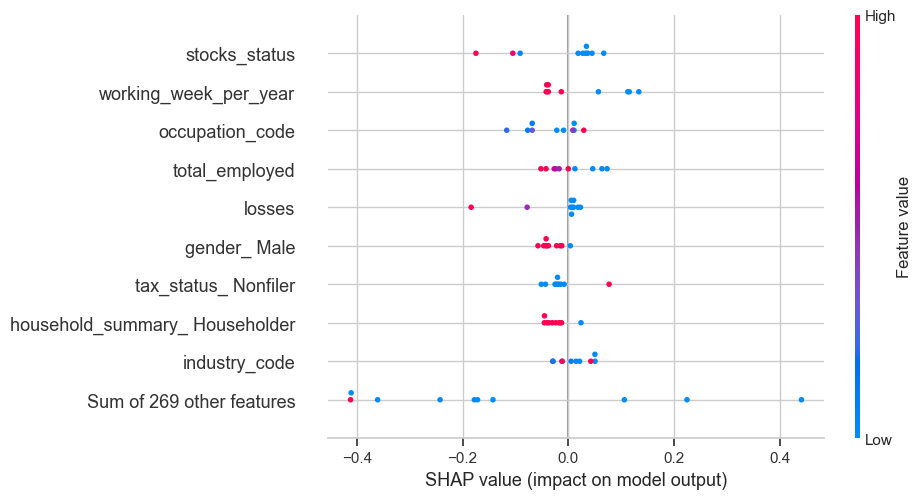

In [227]:
shap.plots.beeswarm(shap_values_beeswarm[:,:,0])


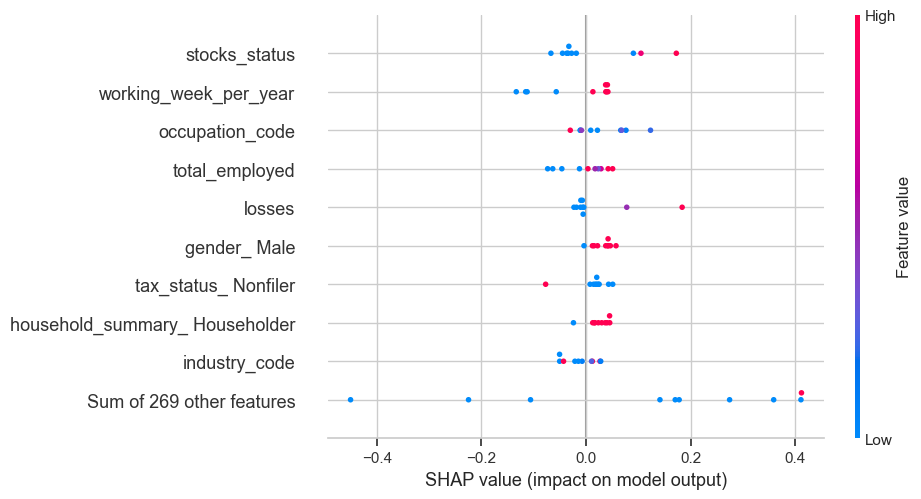

In [228]:
shap.plots.beeswarm(shap_values_beeswarm[:,:,1])